In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2
from PIL import ImageFont,ImageDraw,Image
import scipy.stats as sp

In [8]:
def imshow(tit,image):
    plt.figure(figsize=(20,10))
    plt.title(tit)
    if len(image.shape)==3:
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

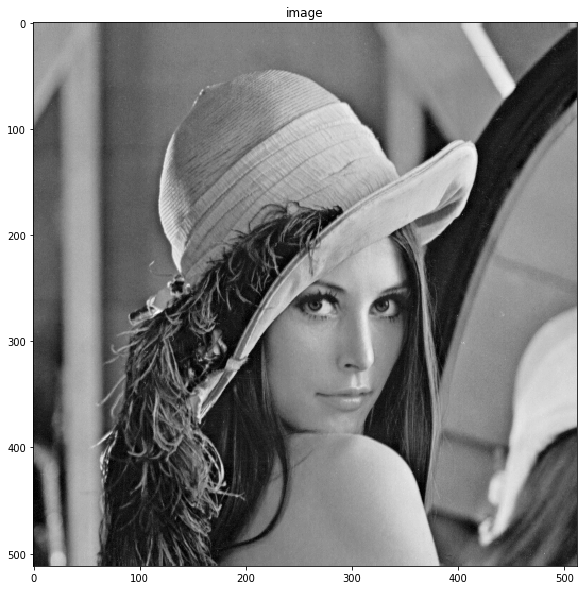

In [9]:
image=cv2.imread('./images/lena.png',0)
imshow('image',image)

Threshold used: 120.0


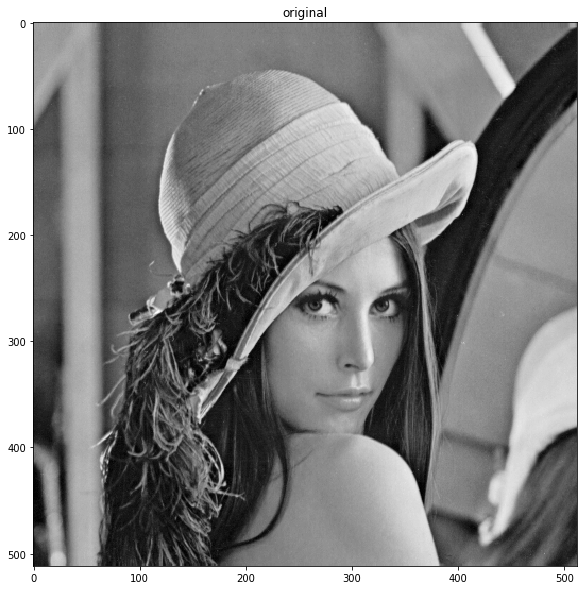

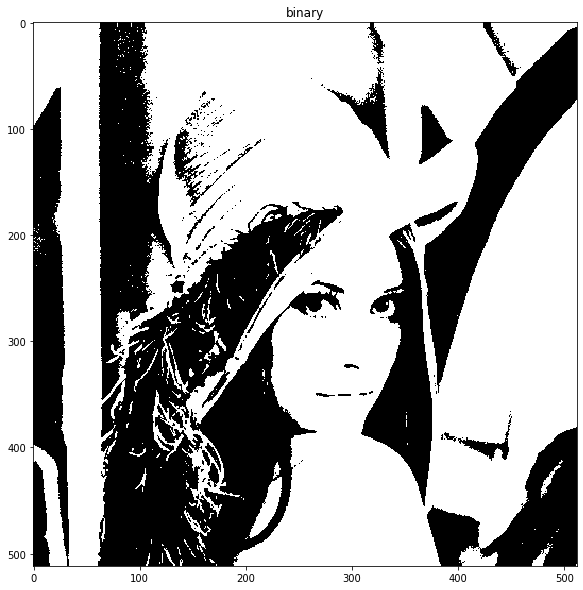

In [10]:
thr,mask=cv2.threshold(image,120,255,cv2.THRESH_BINARY)

print('Threshold used:',thr)
imshow('original',image)



imshow('binary',mask)

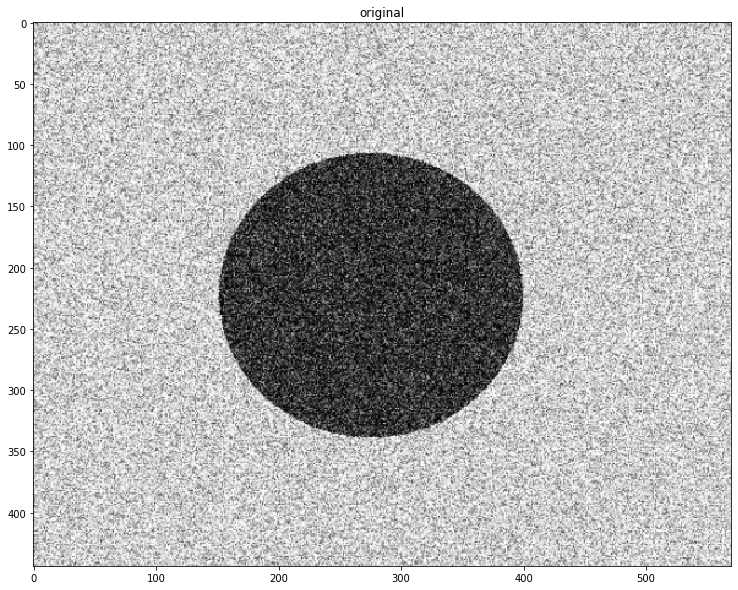

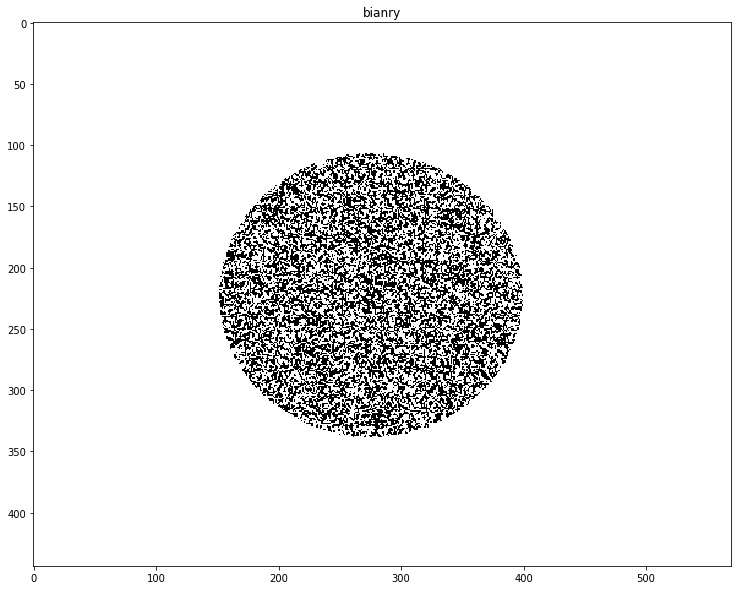

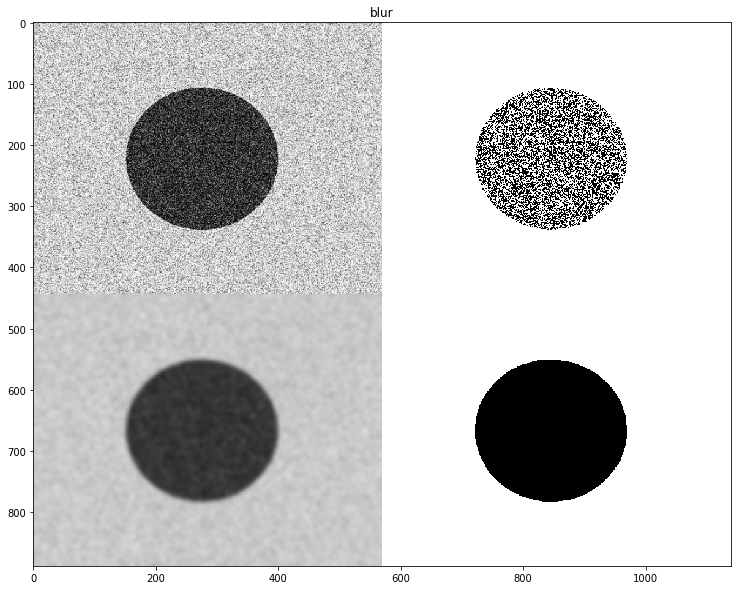

In [11]:
image=cv2.imread('./images/circle.png',0)
imshow('original',image)

_,binary=cv2.threshold(image,50,255,cv2.THRESH_BINARY)
imshow('bianry',binary)

img_blur=cv2.GaussianBlur(image,(21,21),0)
_,binary_blur=cv2.threshold(img_blur,127,255,cv2.THRESH_BINARY)
imshow('blur',np.vstack([np.hstack([image,binary]),np.hstack([img_blur,binary_blur])]))

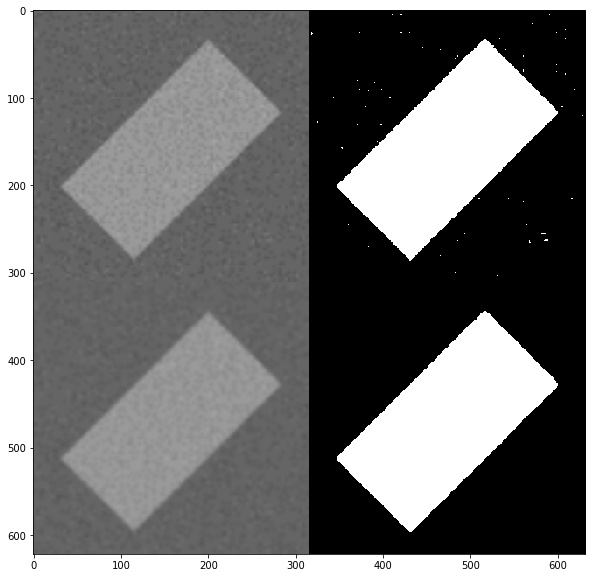

In [12]:
box=cv2.imread('./images/boxnoise.png',0)
_,box_bin=cv2.threshold(box,110,255,cv2.THRESH_BINARY)
box_blur=cv2.GaussianBlur(box,(7,7),0)
_,box_b_b=cv2.threshold(box_blur,110,255,cv2.THRESH_BINARY)

imshow('',np.vstack([np.hstack([box,box_bin]),np.hstack([box_blur,box_b_b])]))

In [13]:
_,box_bin_otsu=cv2.threshold(box,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

124.0


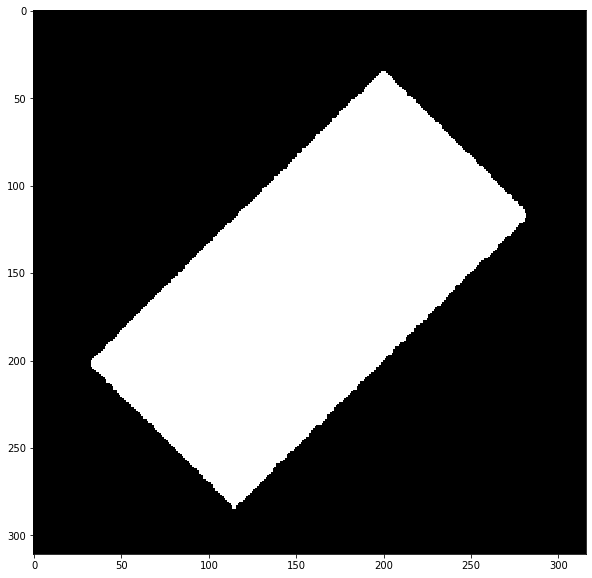

In [14]:
print(_)
imshow('',box_bin_otsu)

In [15]:
n_text=cv2.imread('noisetext.png',0)

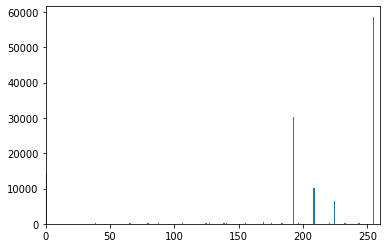

In [16]:
plt.hist(n_text.ravel(),256,[0,256])

plt.show()

10.0


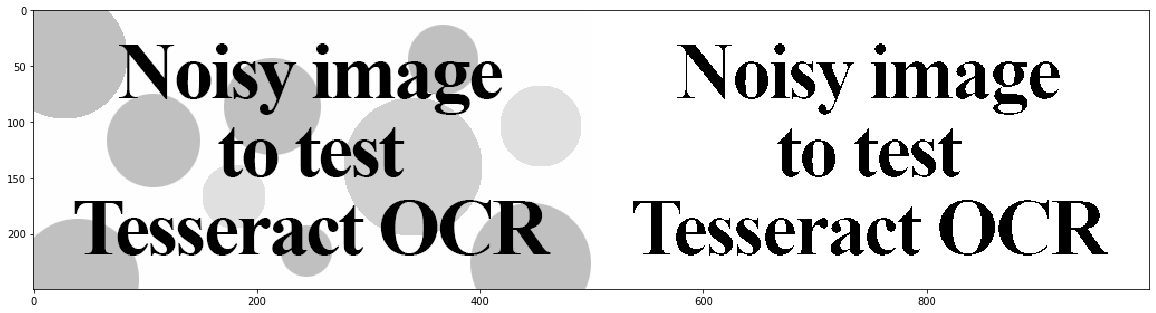

20.0


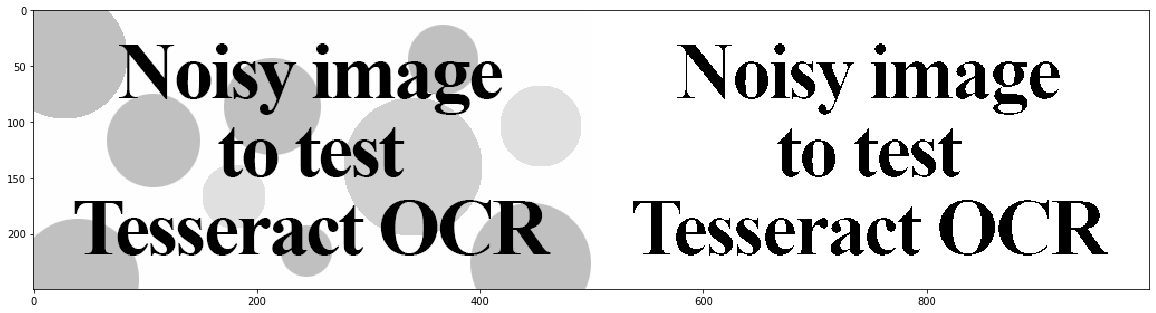

30.0


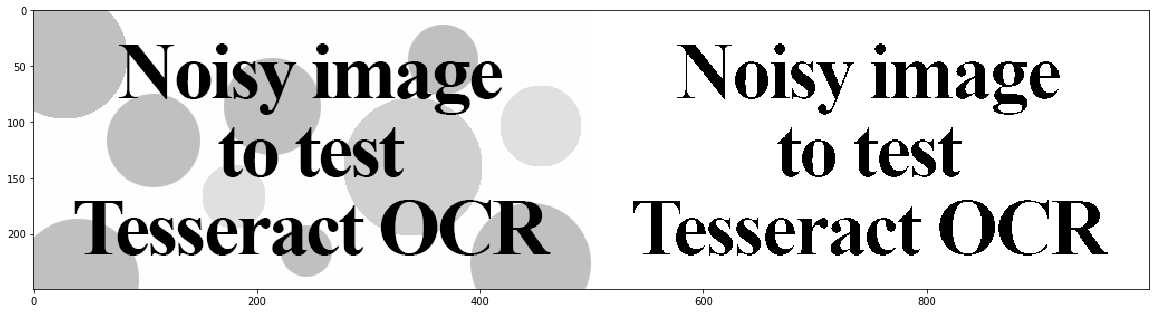

40.0


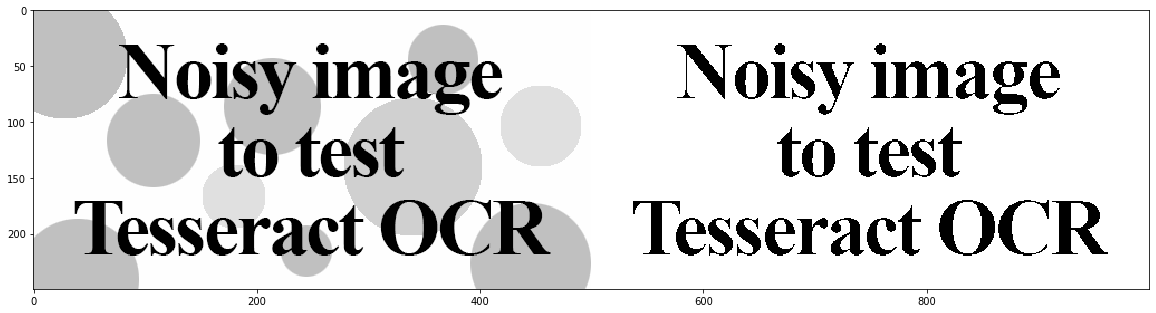

50.0


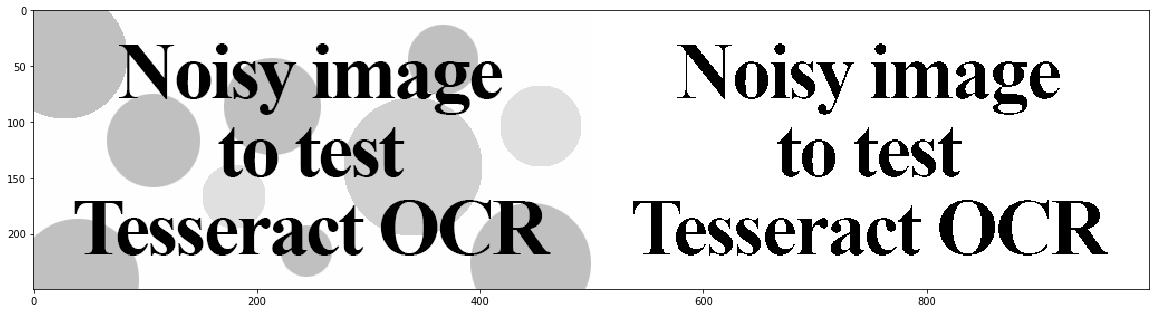

60.0


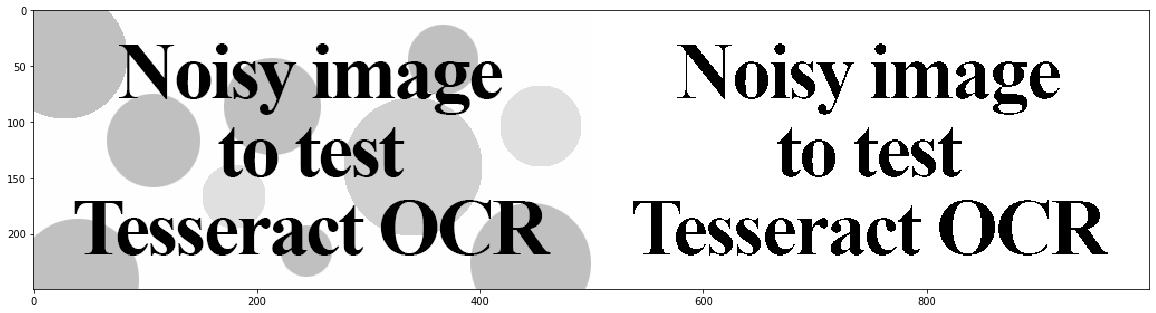

70.0


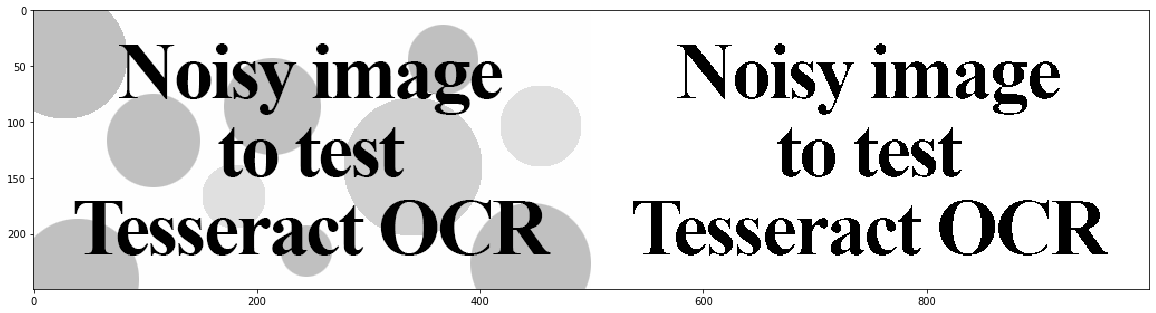

80.0


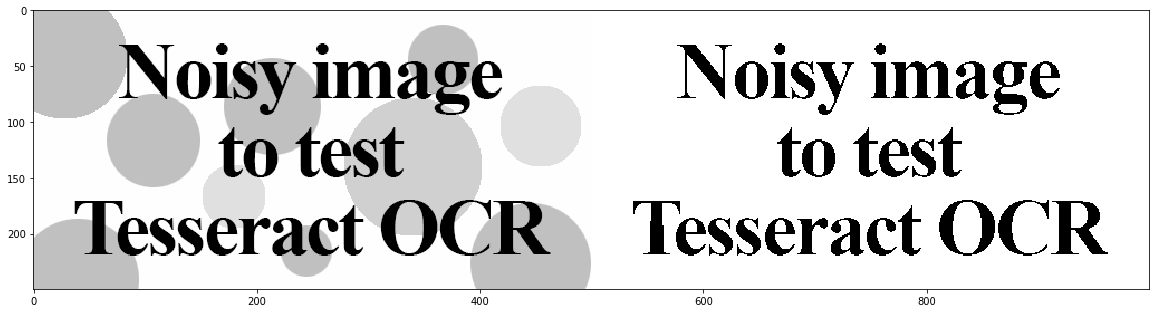

90.0


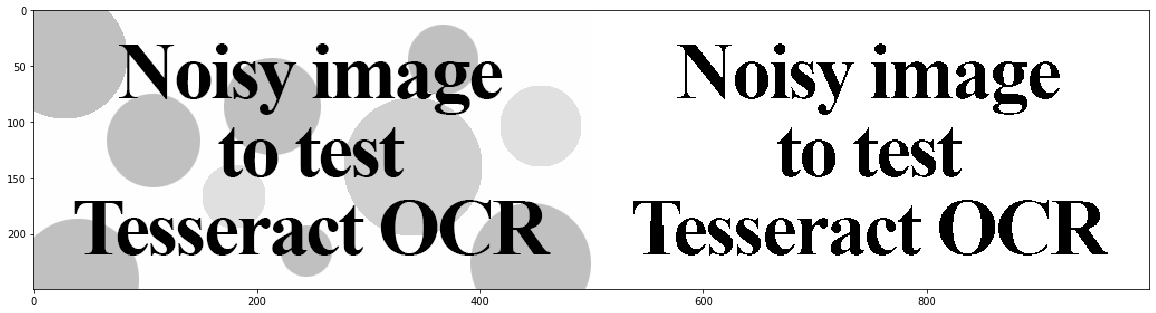

100.0


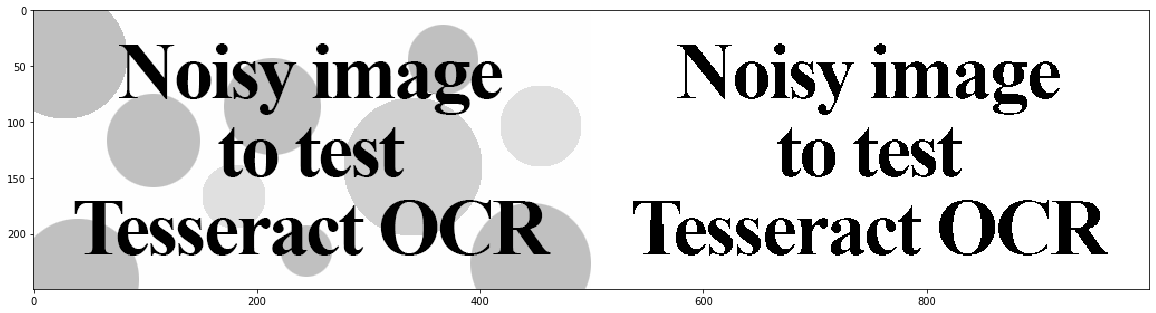

110.0


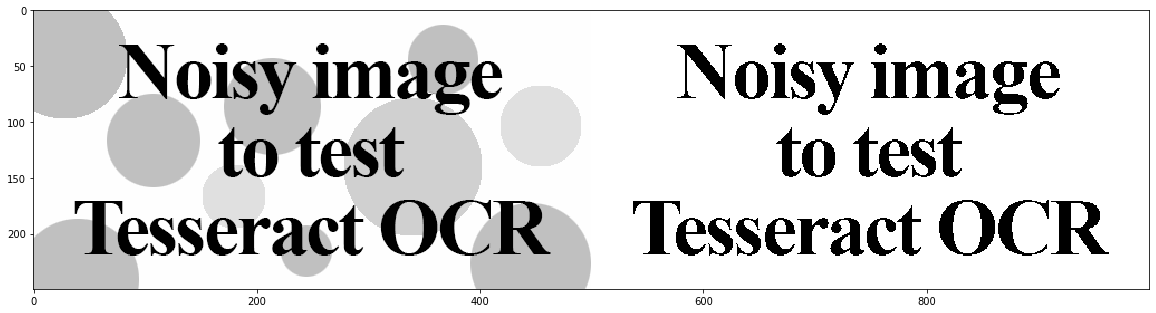

120.0


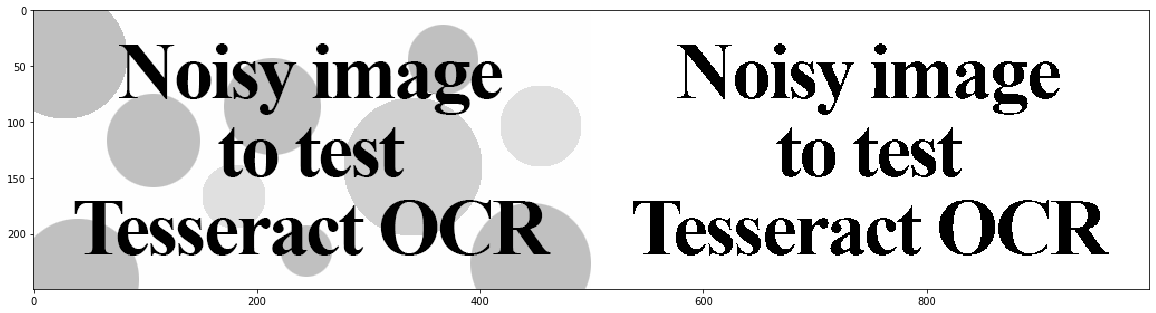

130.0


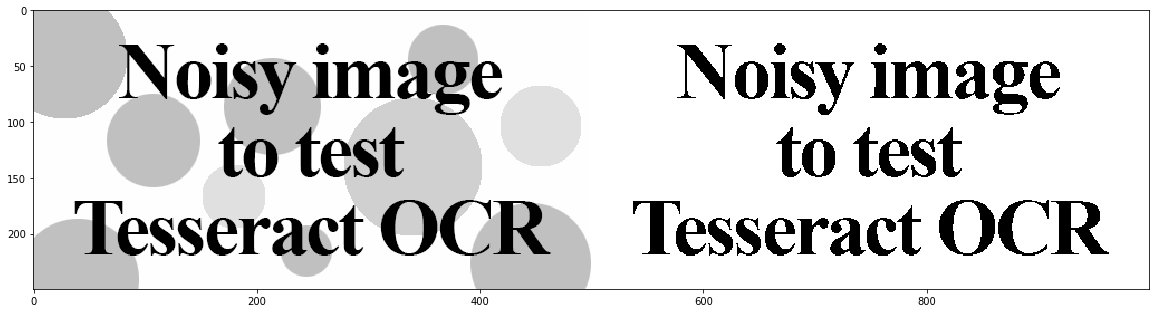

140.0


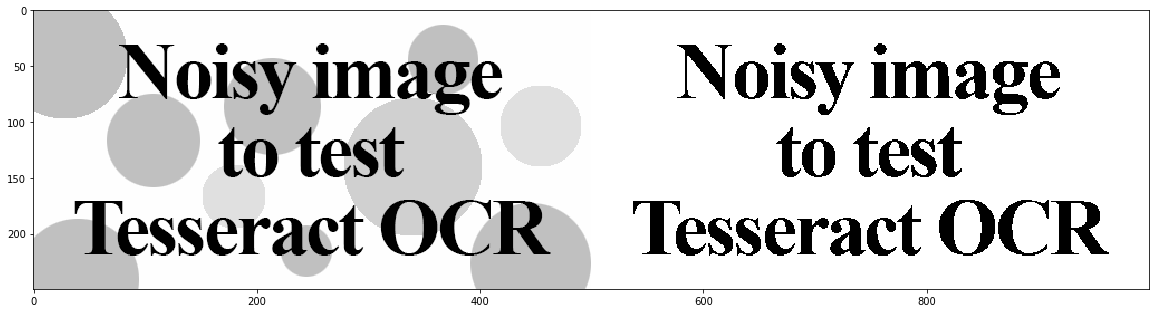

150.0


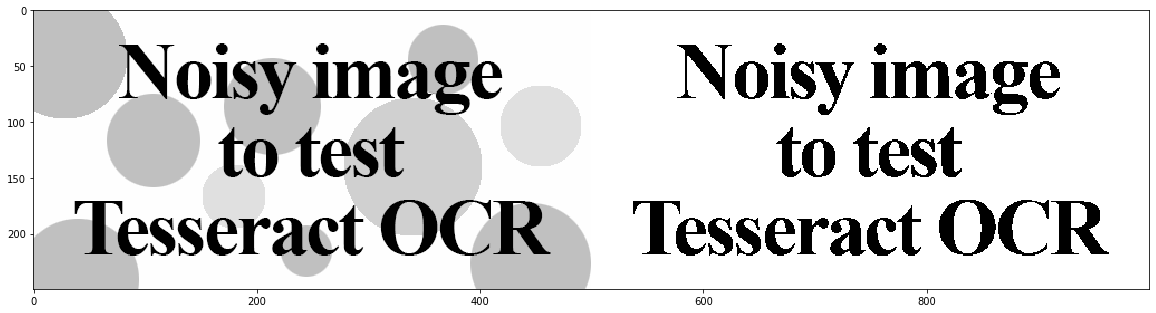

160.0


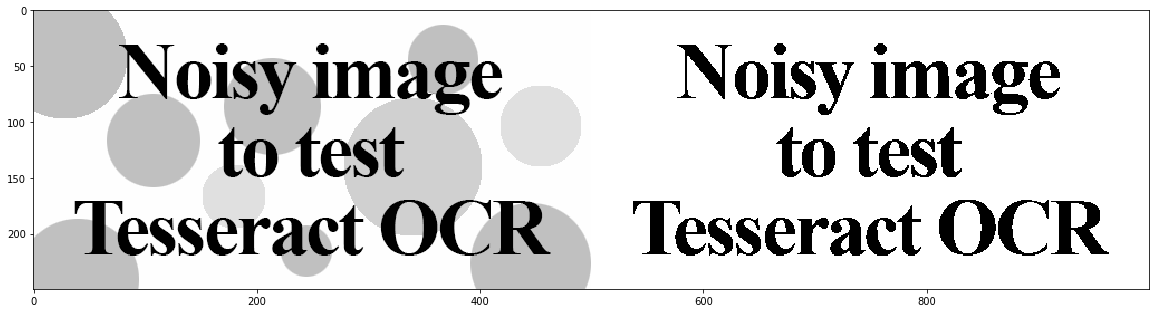

170.0


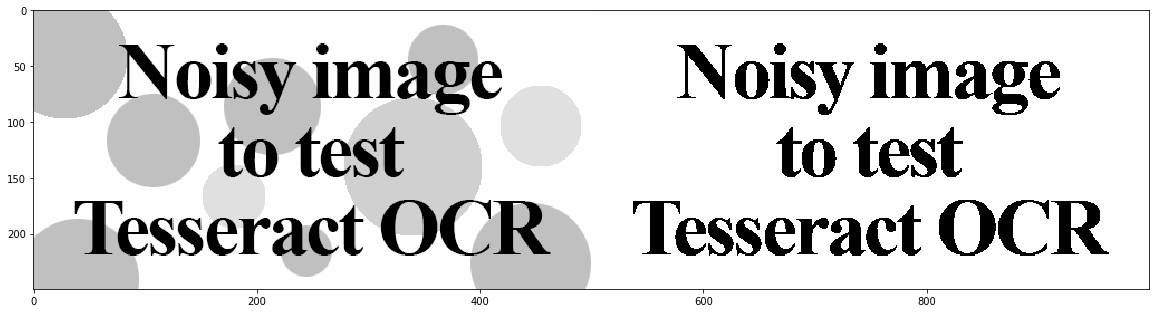

180.0


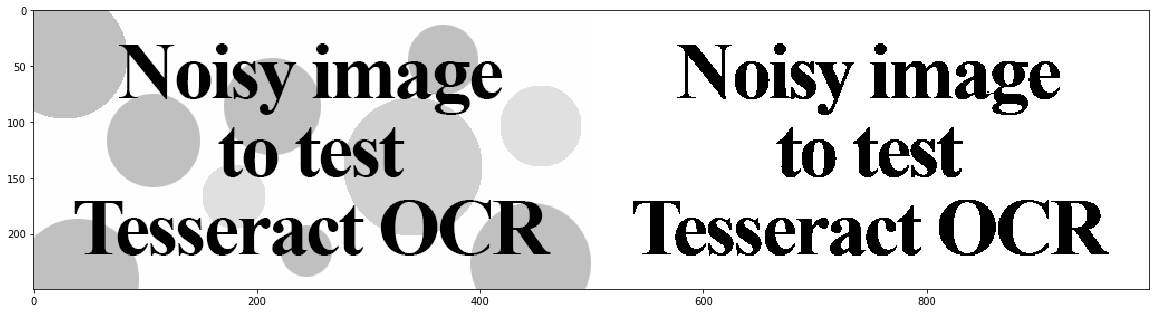

190.0


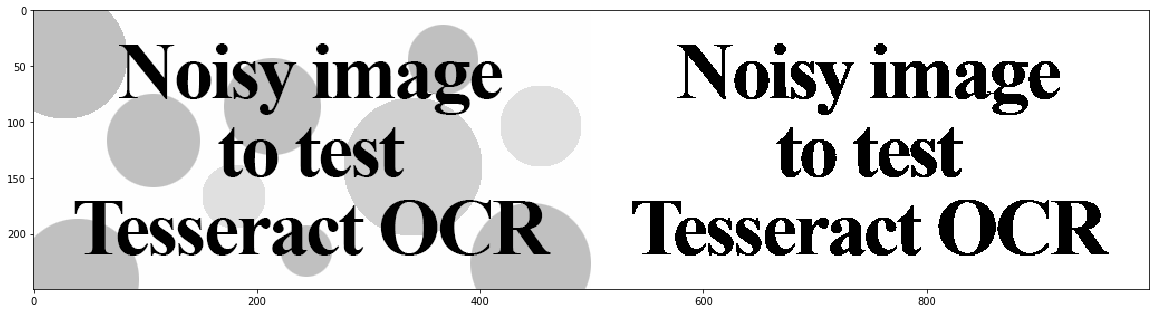

200.0


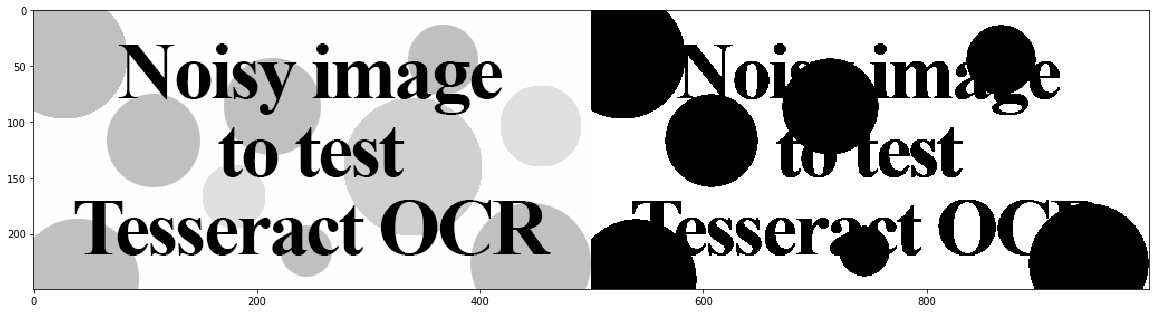

210.0


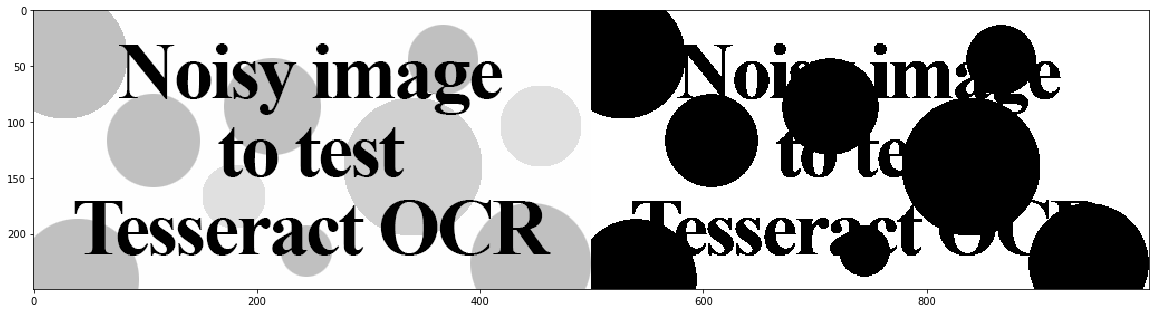

220.0


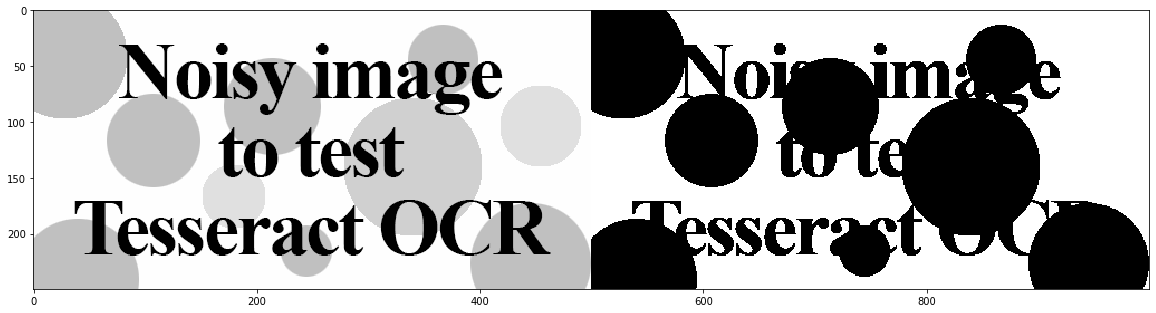

230.0


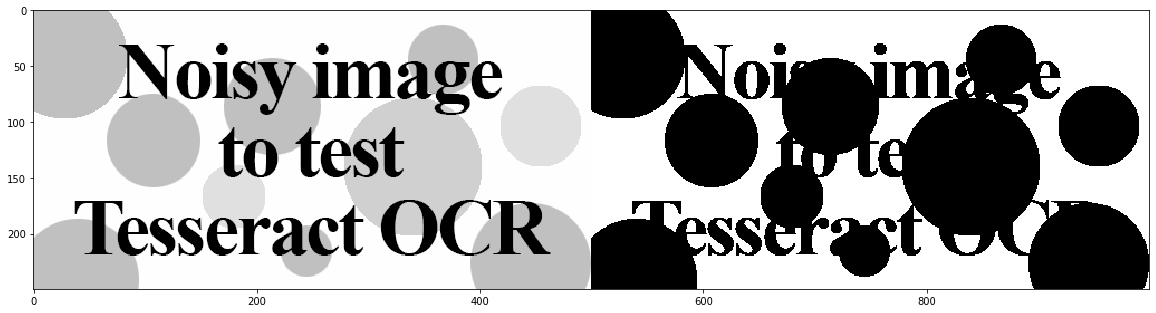

240.0


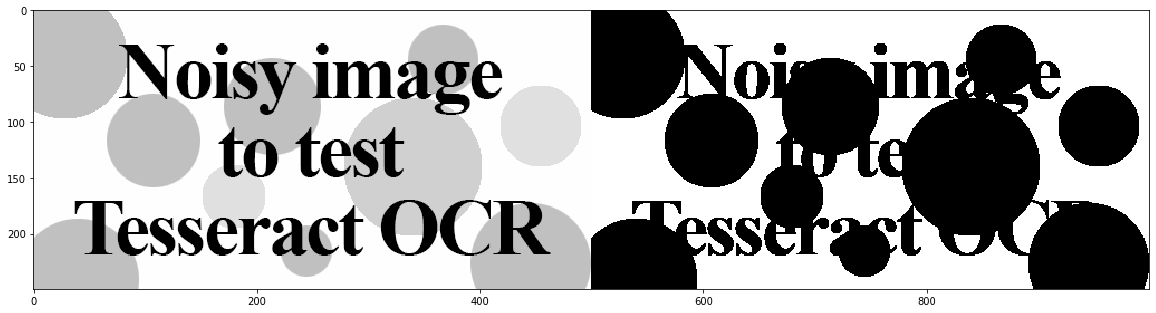

250.0


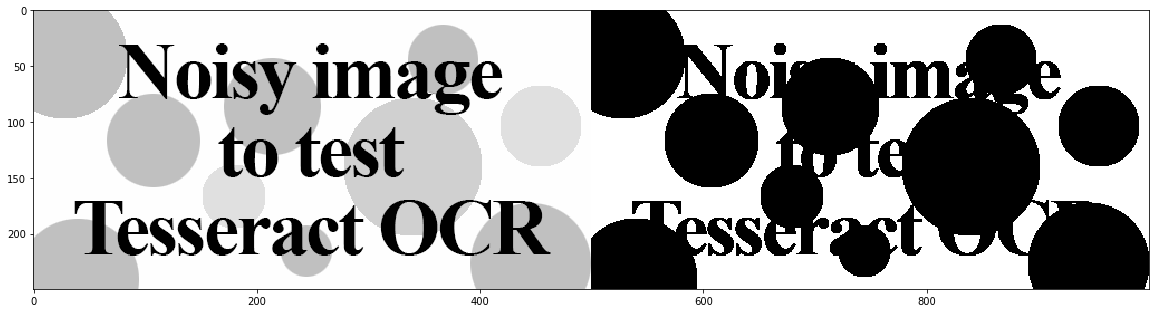

In [17]:
for x in range(10,255,10):
    _,text_bin=cv2.threshold(n_text,x,255,cv2.THRESH_BINARY)
    print(_)
    imshow('',np.hstack([n_text,text_bin]))

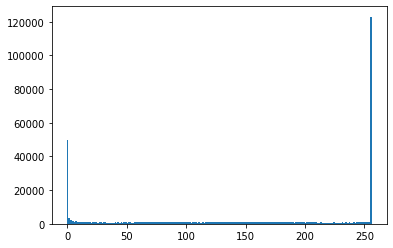

10.0


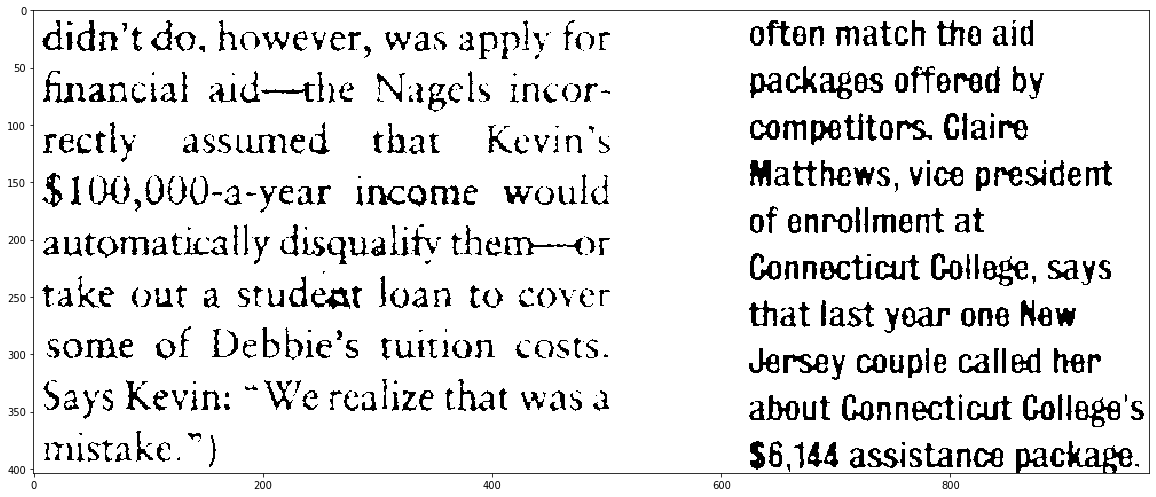

15.0


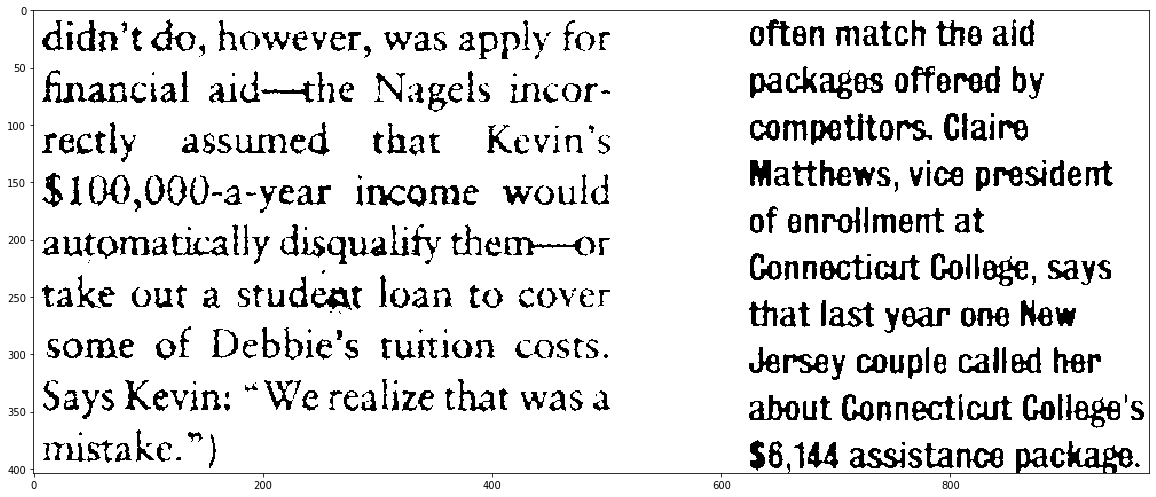

20.0


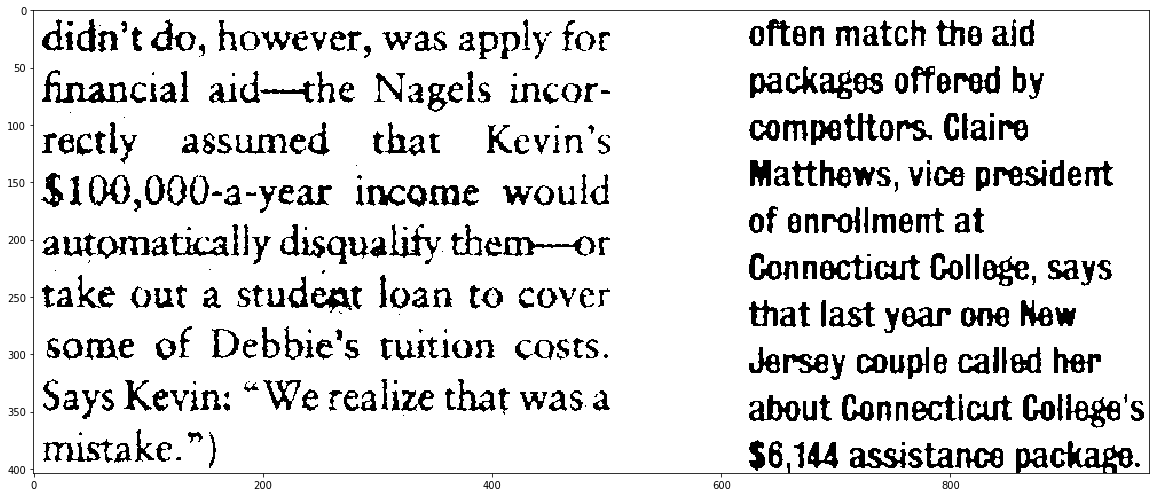

25.0


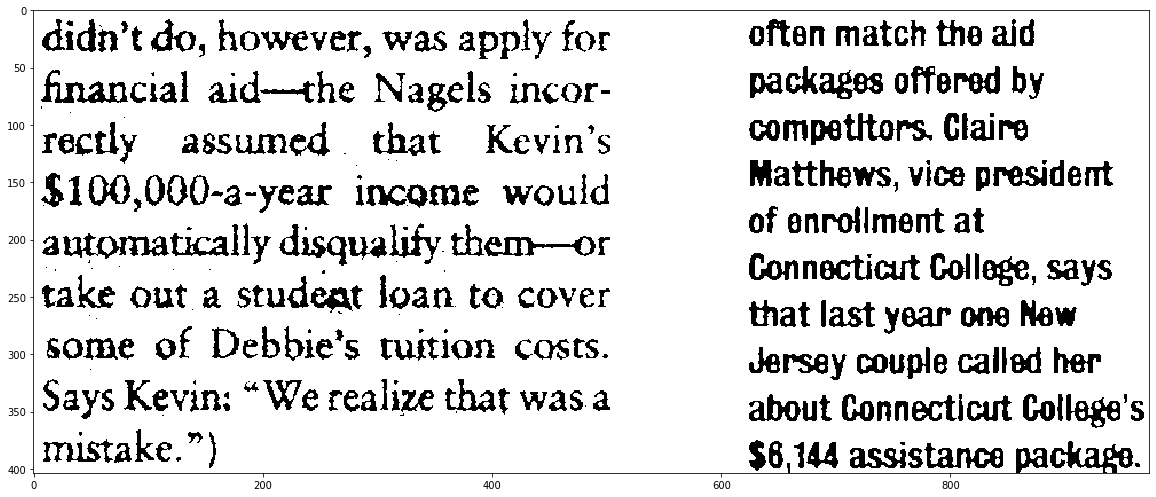

30.0


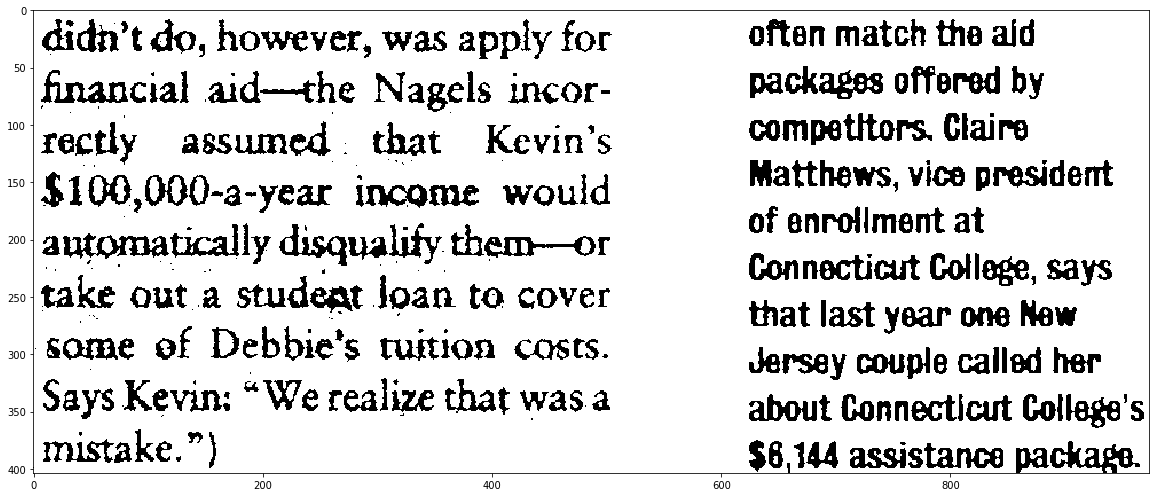

35.0


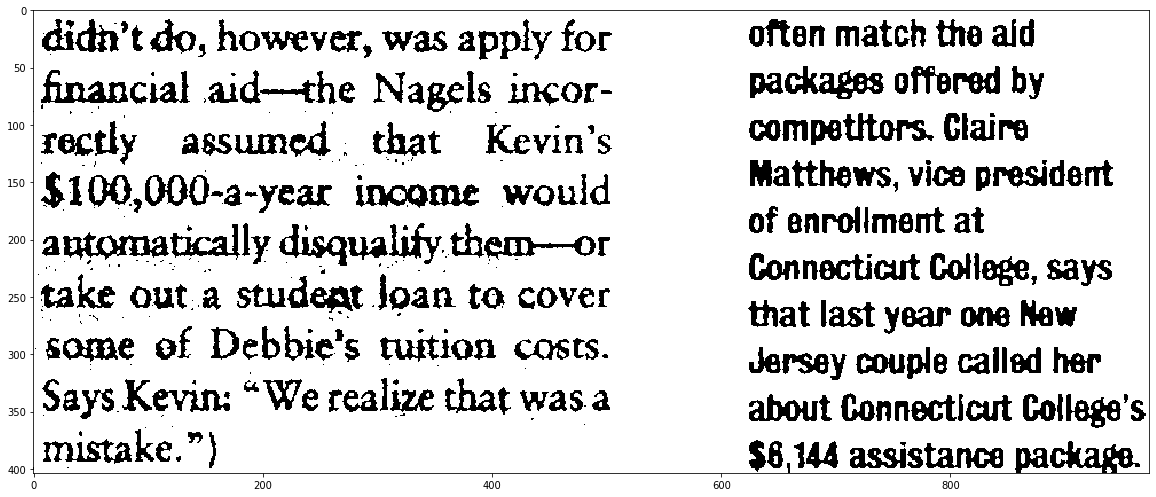

40.0


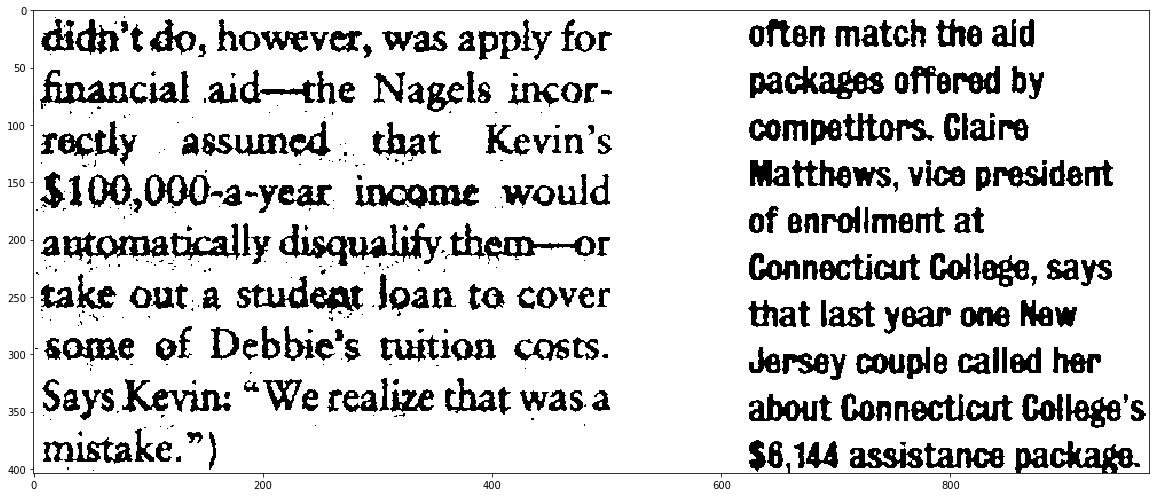

45.0


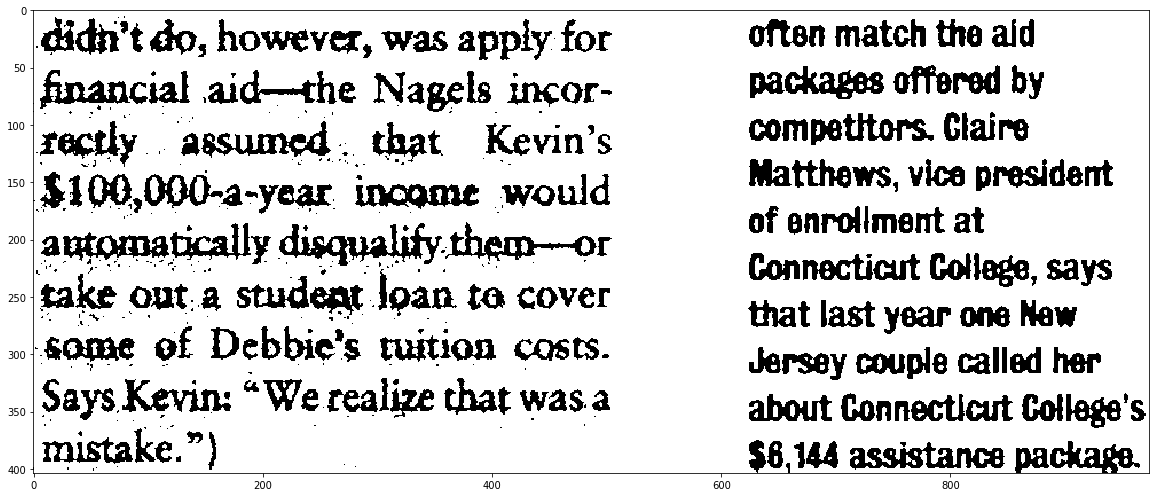

50.0


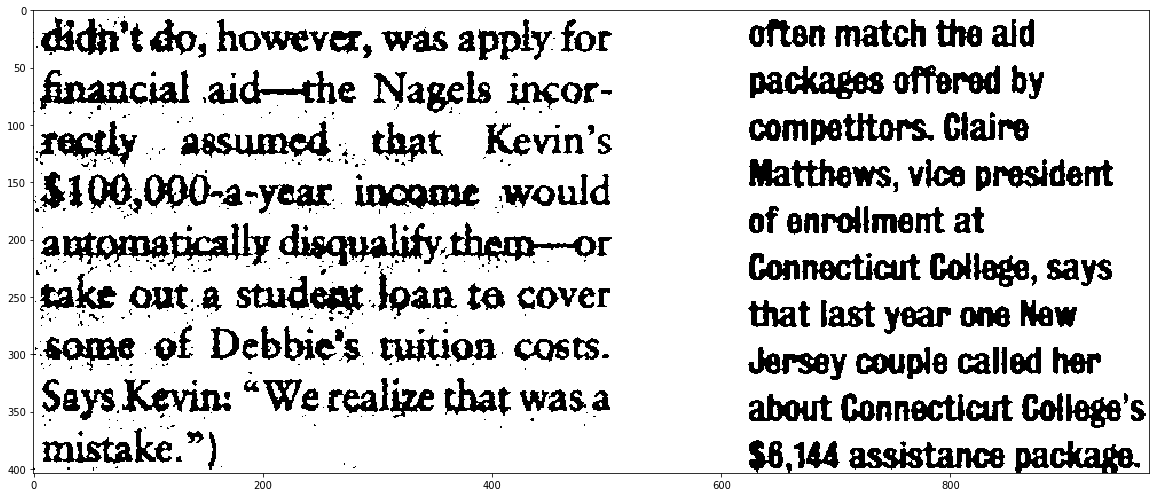

55.0


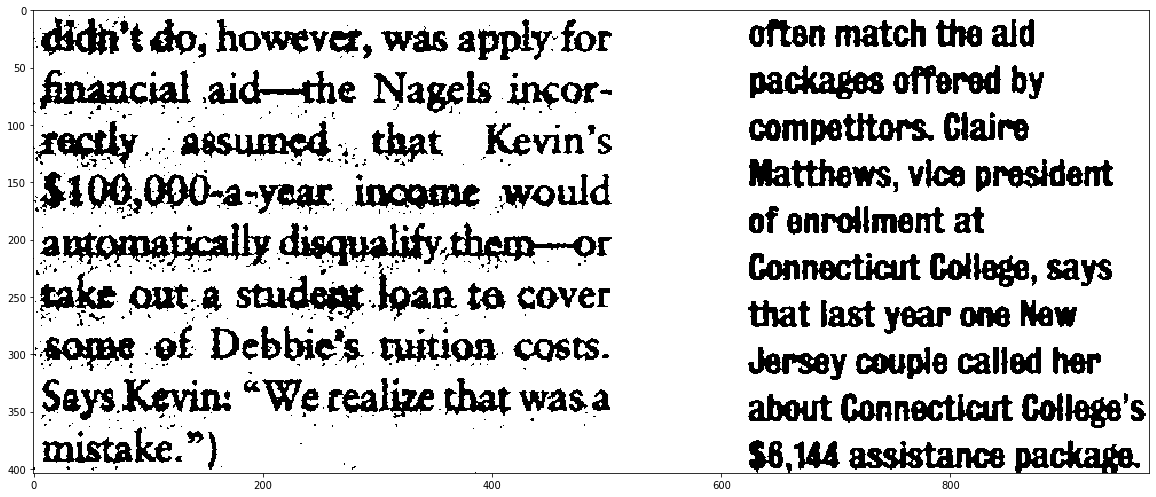

60.0


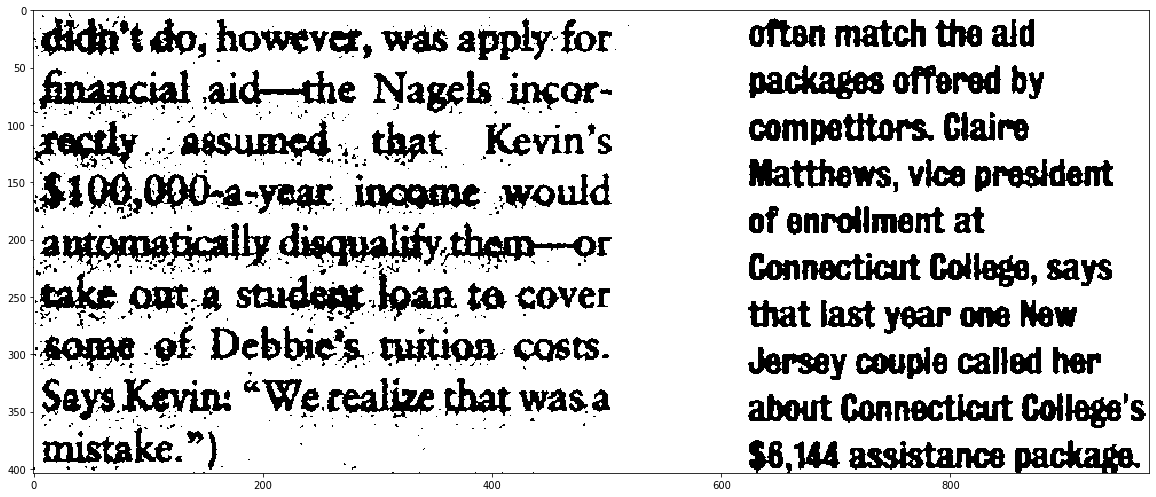

65.0


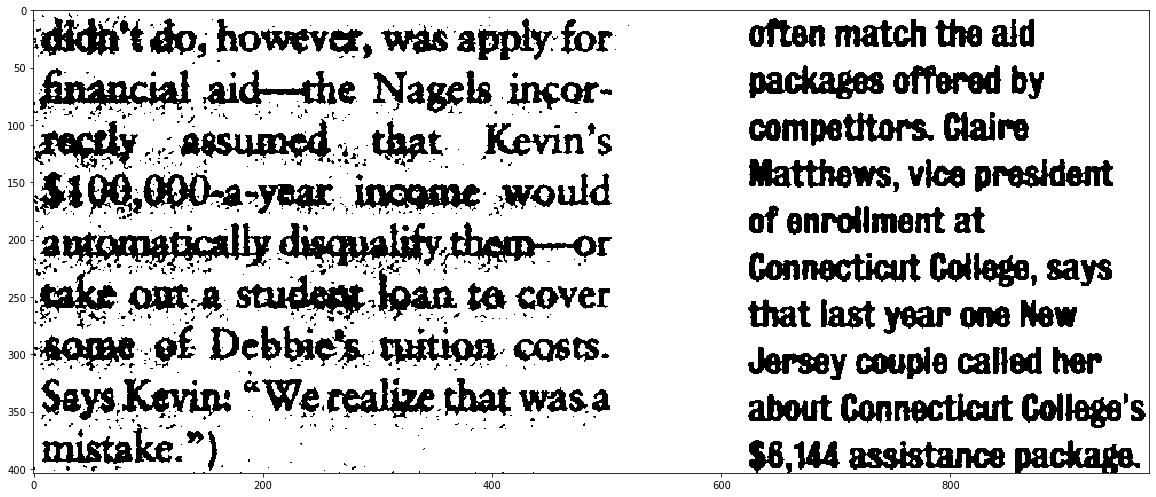

In [18]:
ocr=cv2.imread('noiseocr.png',0)

plt.hist(ocr.ravel(),256,[0,256])
plt.show()
#kernel=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

ocr_b=cv2.GaussianBlur(ocr,(3,3),0)
#ocr_b_f=cv2.filter2D(ocr_b,-1,kernel)
for x in range(10,70,5):
    _,ocr_bin=cv2.threshold(ocr_b,x,255,cv2.THRESH_BINARY)
    print(_)
    imshow('',ocr_bin)

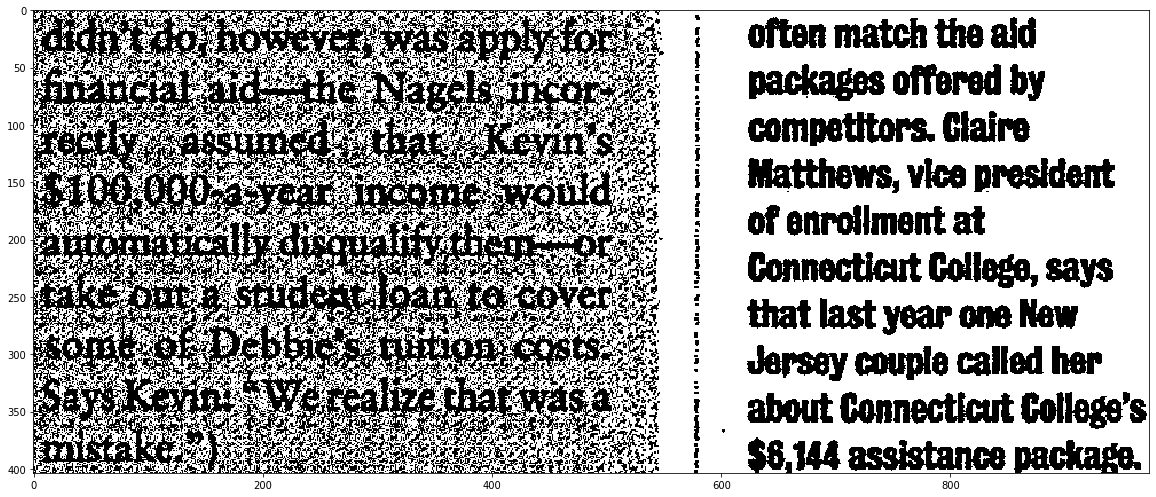

In [157]:
ocr_adapt=cv2.adaptiveThreshold(ocr,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,33,2)
imshow('',ocr_adapt)

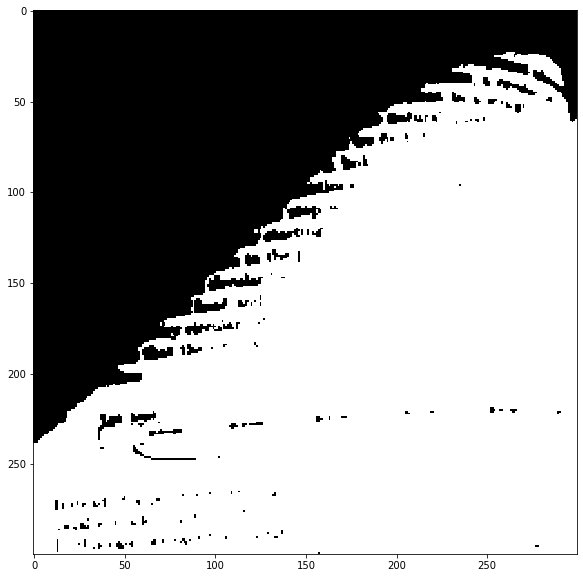

In [131]:
textimg=cv2.imread('./images/text.jpg',0)

textimg_b=cv2.GaussianBlur(textimg,(3,3),0)
_,textimg_b_b=cv2.threshold(textimg_b,90,255,cv2.THRESH_BINARY)
imshow('',textimg_b_b)

<h3>adpative threshold</h3>
위와 같이 밝기가 서로 다른경우 글로벌 조작으로는 이미지 처리 불가함
<br>-> adaptiveTreshold 사용

 cv2.adaptiveThreshold(ocr,255,평균을 구하는 방법,cv2.THRESH_BINARY,나누는 블럭의 크기,평균 가중치)

adaptiveThreshold는 블럭으로 나눠서 평균값을 구하고 평균보다 크면 전경/평균보다 작으면 배경으로 인식</br>

일반적 평균->산술평균(1/n)
Gaussian평균->Gaussian curve에 따라 가중치
</br>

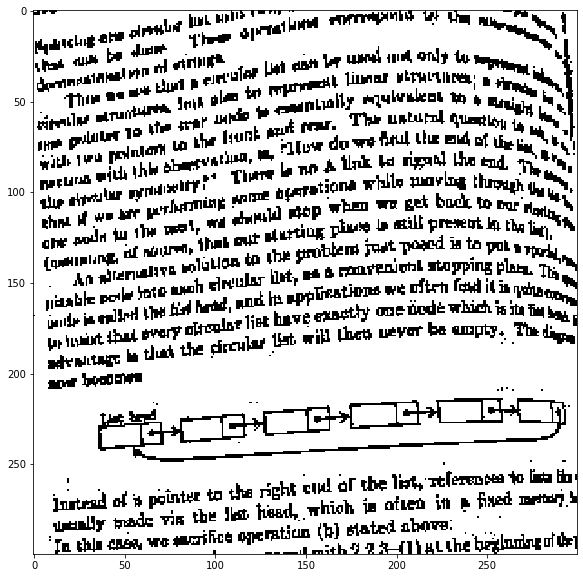

In [158]:
adapt_th=cv2.adaptiveThreshold(textimg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,5)
imshow('',adapt_th)

94.0


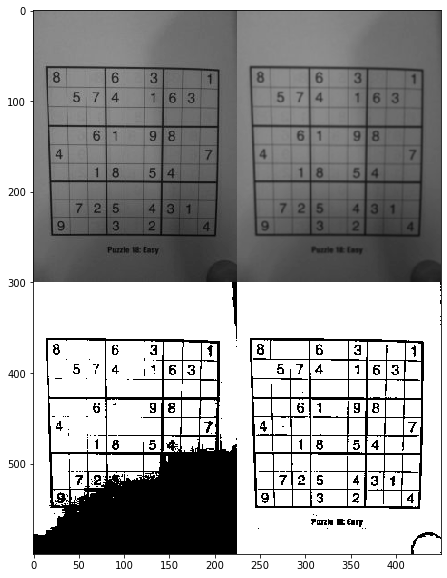

In [172]:
grid=cv2.imread('./images/grid.jpg',0)
grid_b=cv2.GaussianBlur(grid,(3,3),0)
_,grid_bin=cv2.threshold(grid,94,255,cv2.THRESH_BINARY)
print(_)
grid_abin=cv2.adaptiveThreshold(grid,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,5)

imshow('',np.vstack([np.hstack([grid,grid_b]),np.hstack([grid_bin,grid_abin])]))

113.0


True

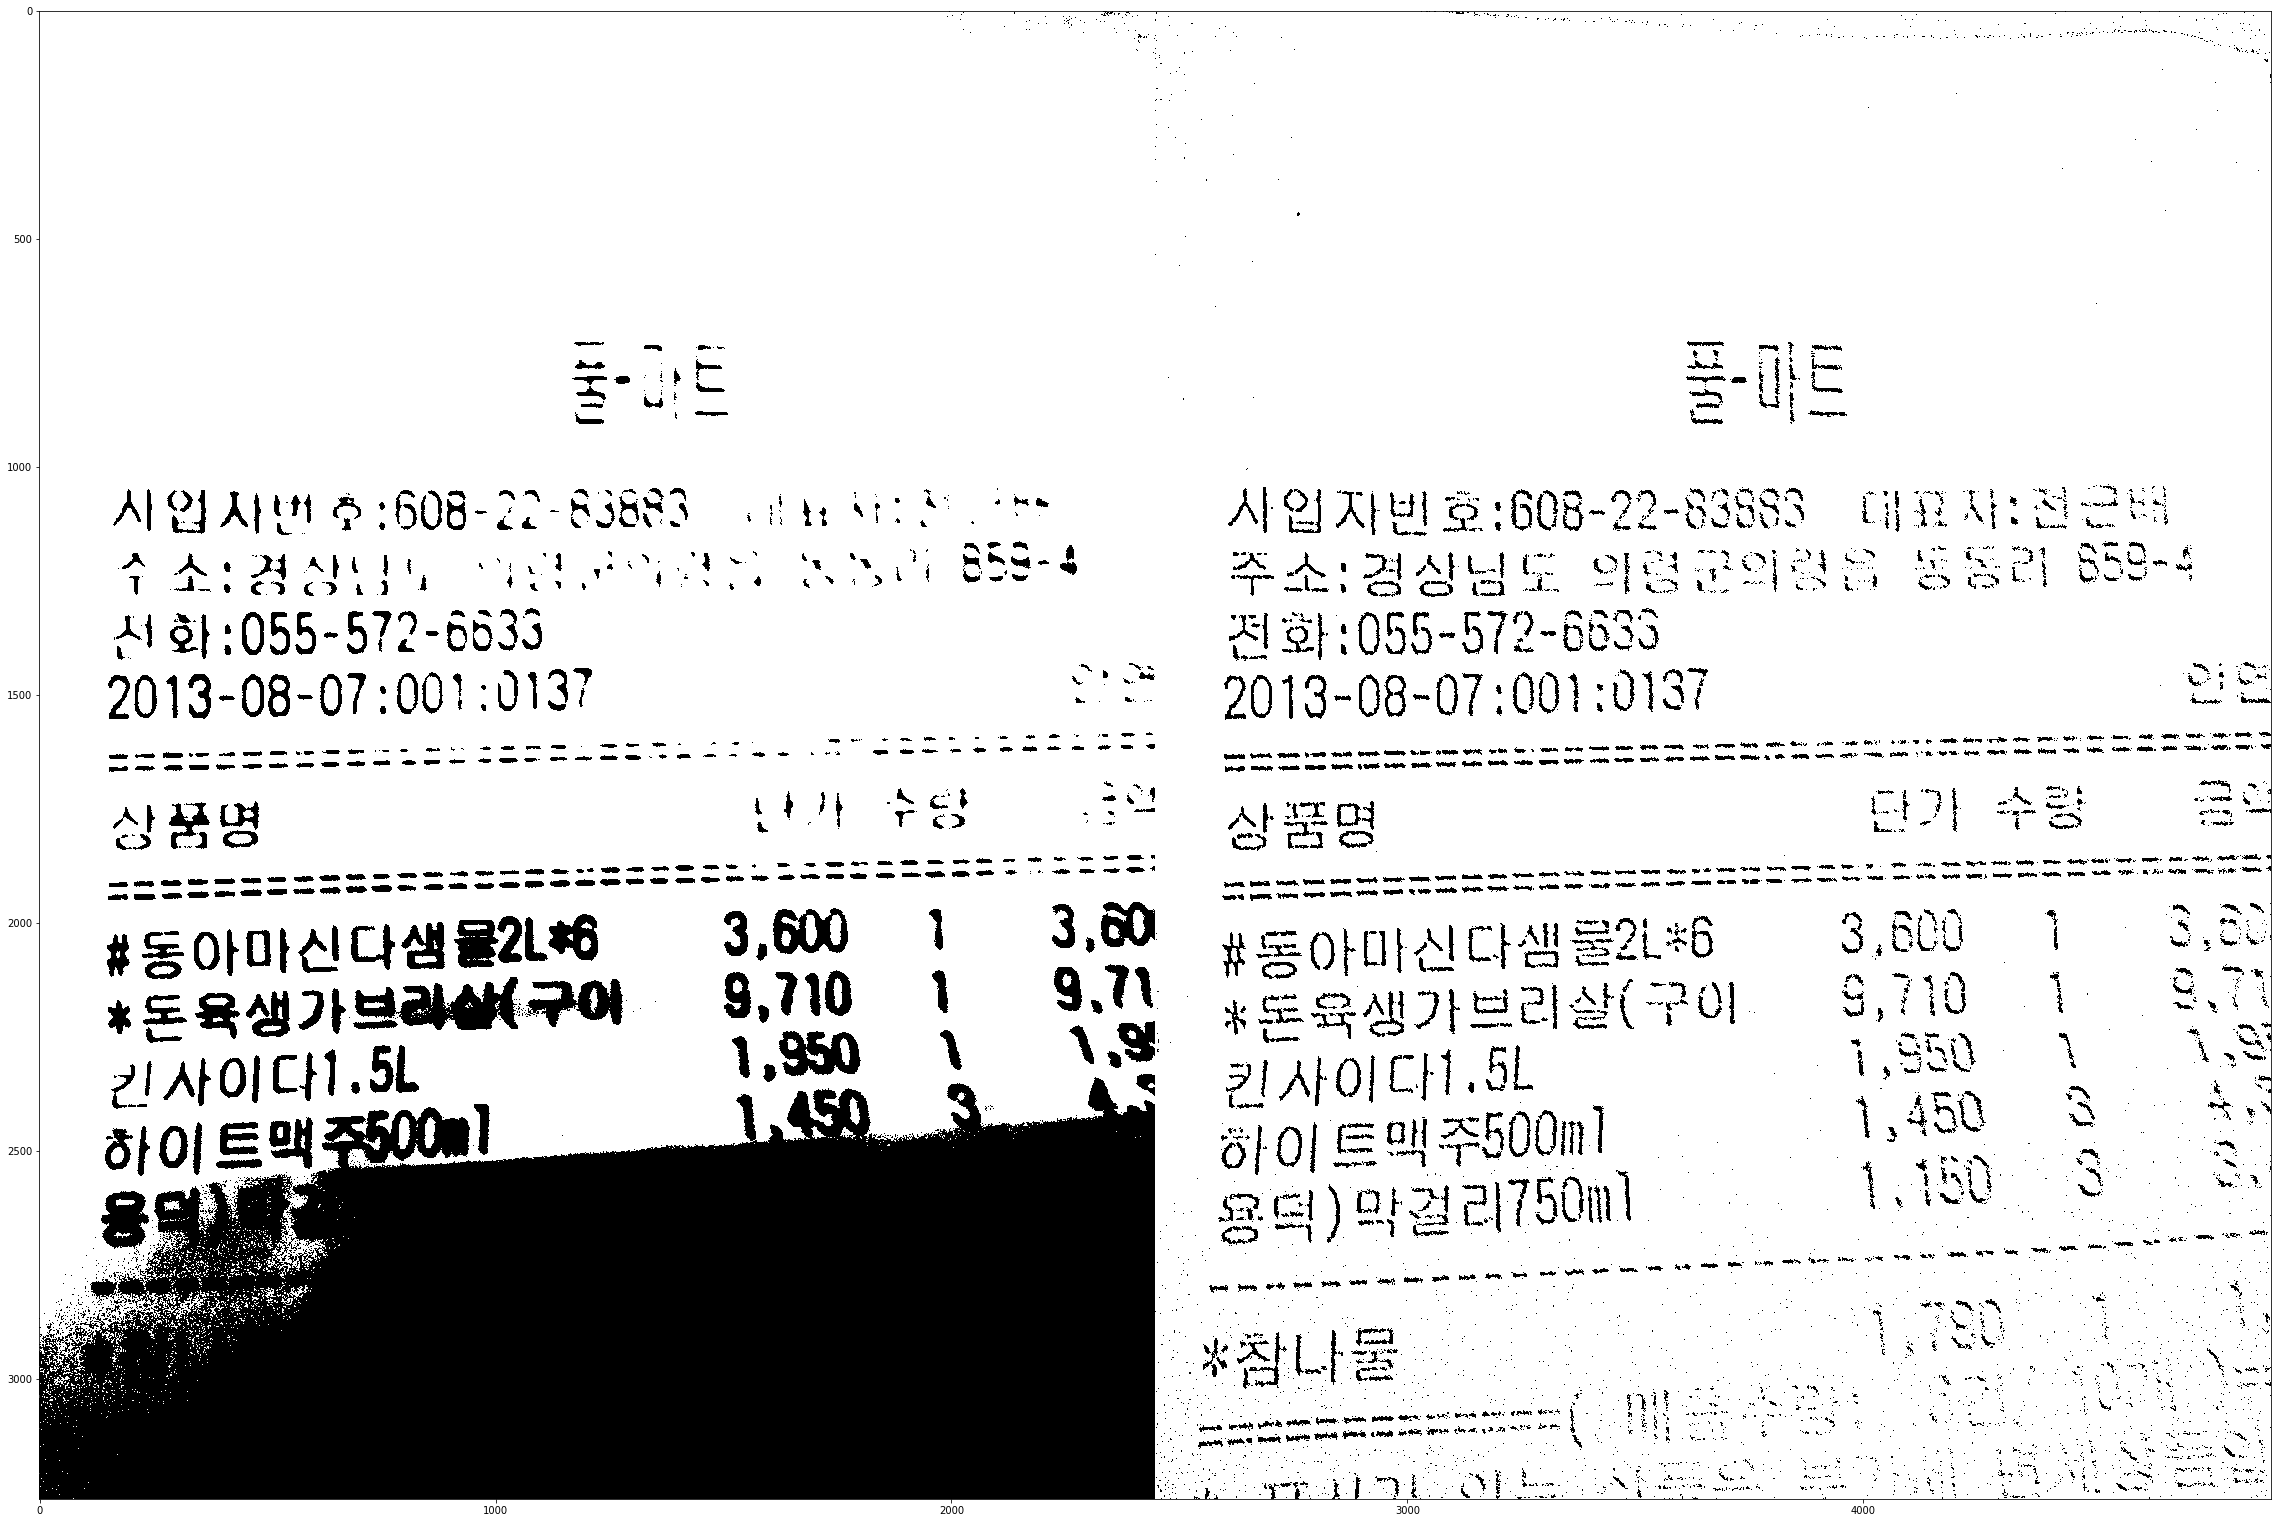

In [210]:
recipt=cv2.imread('recipt.jpg',0)
recipt_b=cv2.GaussianBlur(recipt,(3,3),0)
_,recipt_bin=cv2.threshold(recipt,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(_)
recipt_blur=cv2.medianBlur(recipt,3)
recipt_abin=cv2.adaptiveThreshold(recipt_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,5)

plt.imshow(np.hstack([recipt_bin,recipt_abin]),cmap='gray')
cv2.imwrite('recipt.png',np.hstack([recipt,recipt_abin]))

<img src=recipt.png?312 width=1000>

147.0


True

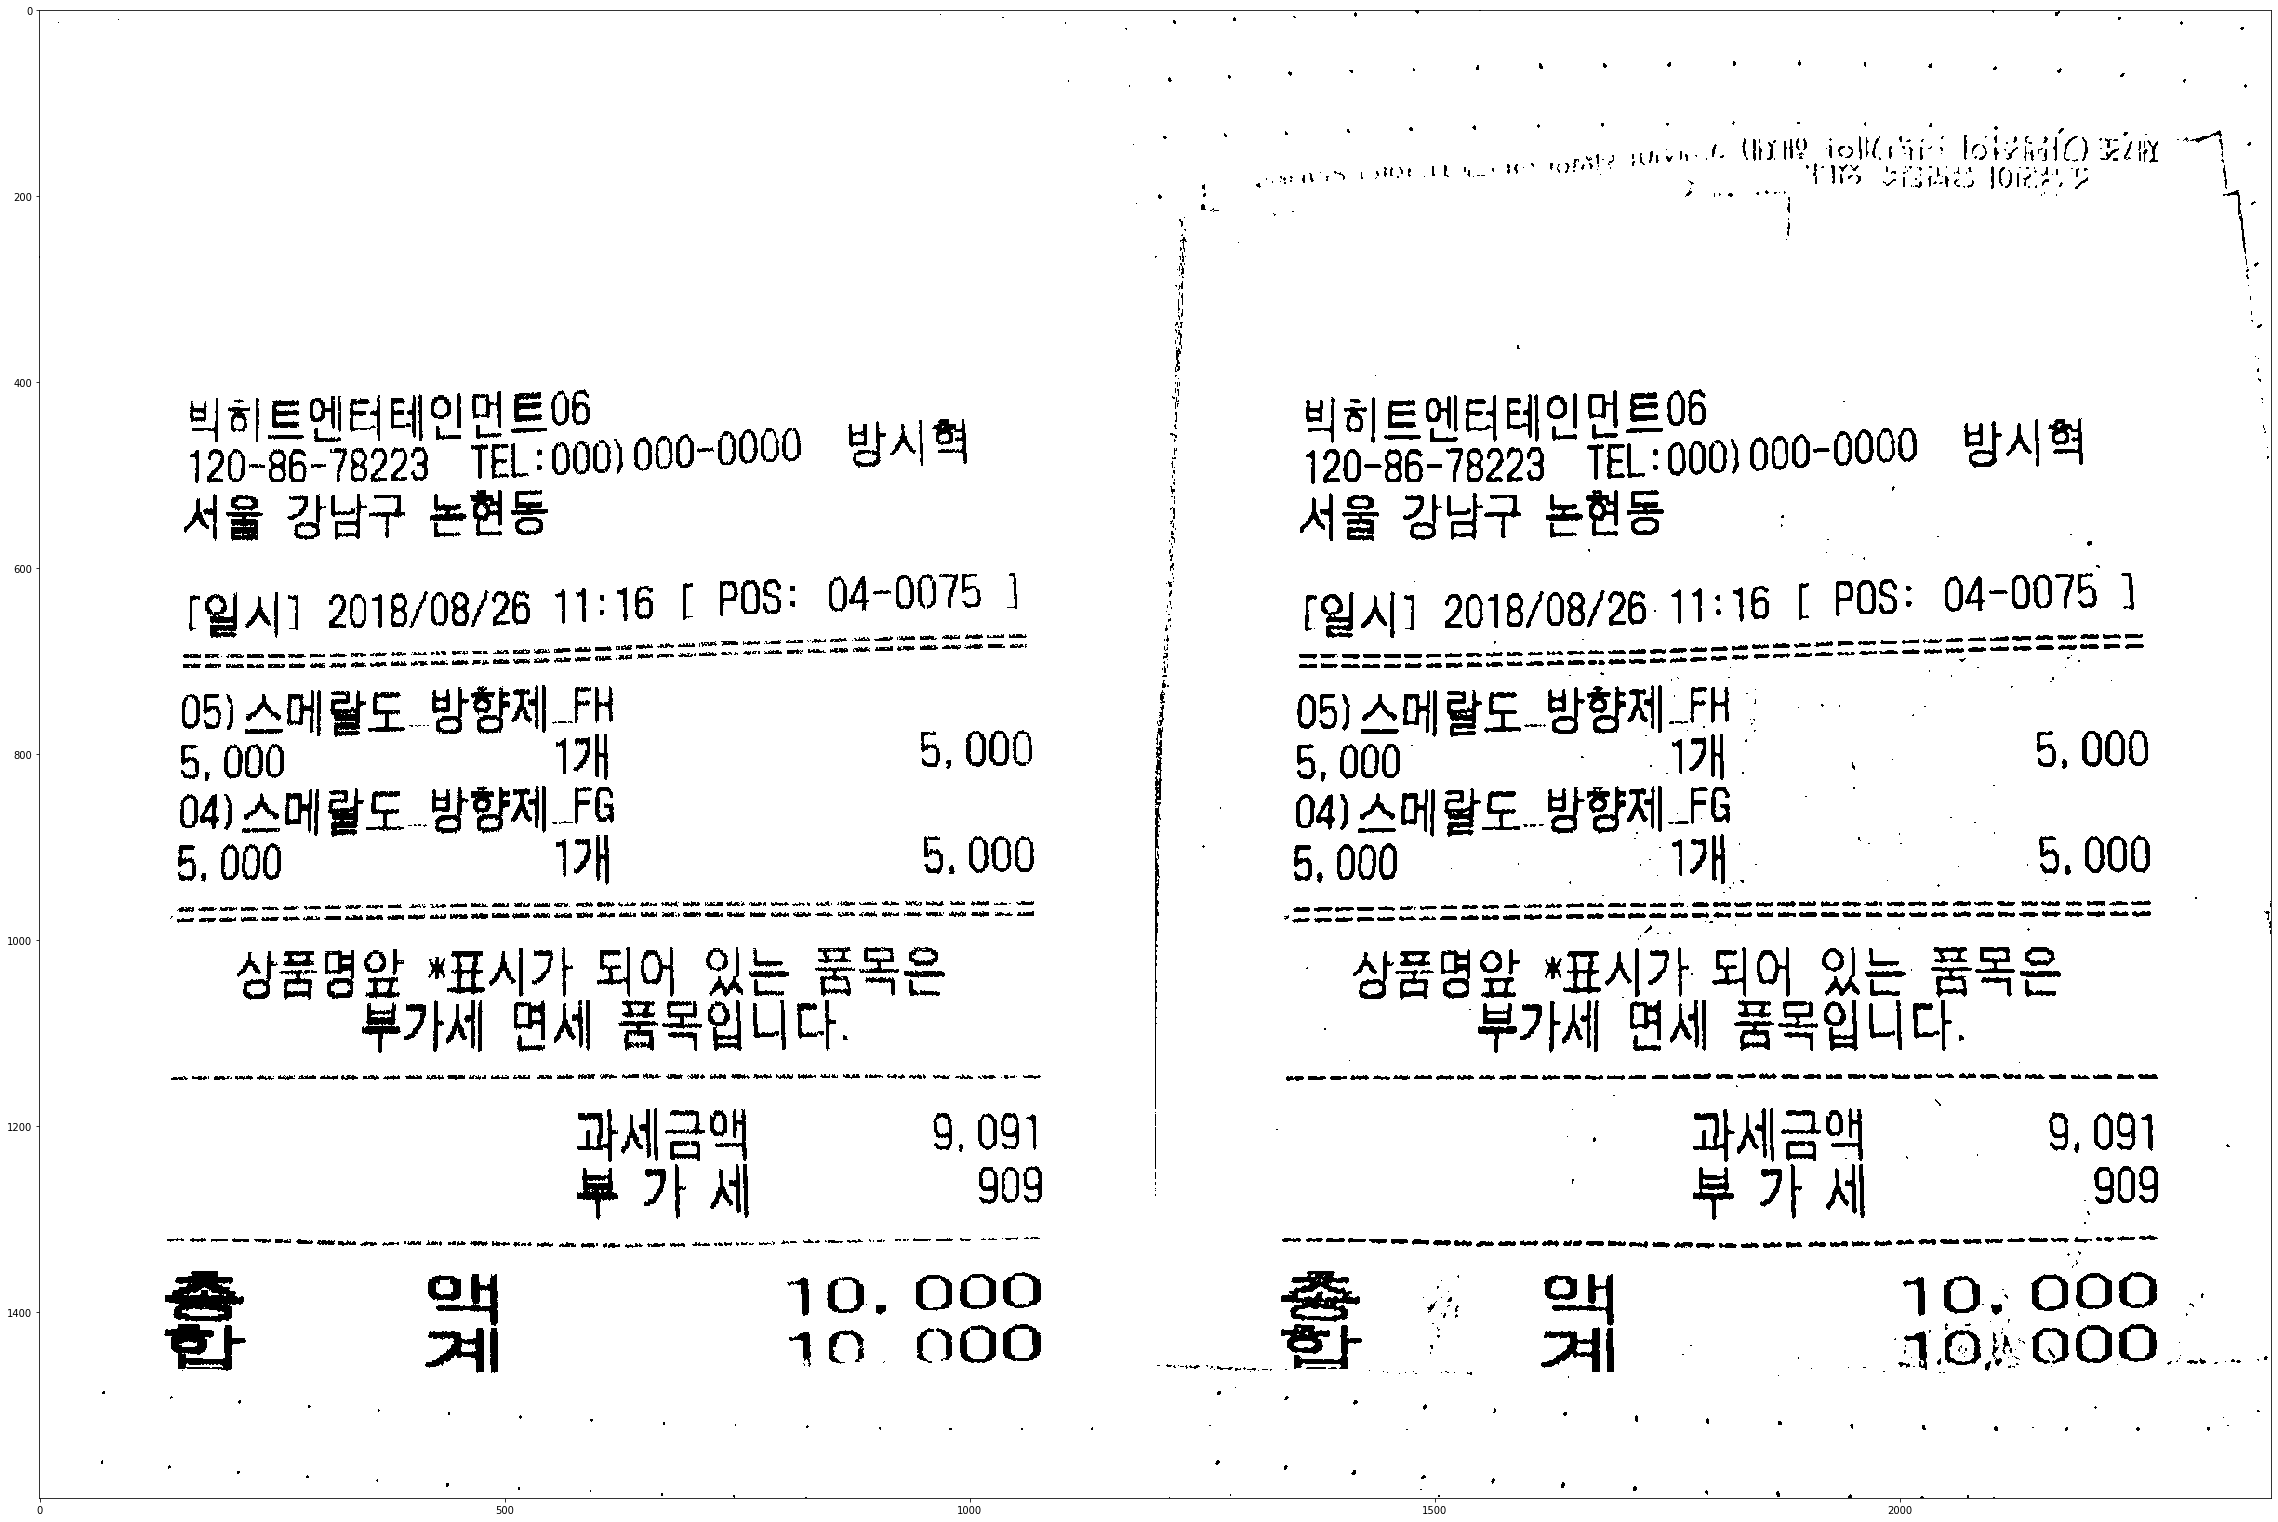

In [319]:
rct=cv2.imread('rct.jpg',0)
rct_b=cv2.GaussianBlur(rct,(3,3),0)
_,rct_bin=cv2.threshold(rct,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(_)
rct_blur=cv2.medianBlur(rct,3)
rct_abin=cv2.adaptiveThreshold(rct_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,5)
plt.figure(figsize=(40,40))
plt.imshow(np.hstack([rct_bin,rct_abin]),cmap='gray')
cv2.imwrite('rcpt.png',np.hstack([rct,rct_abin]))

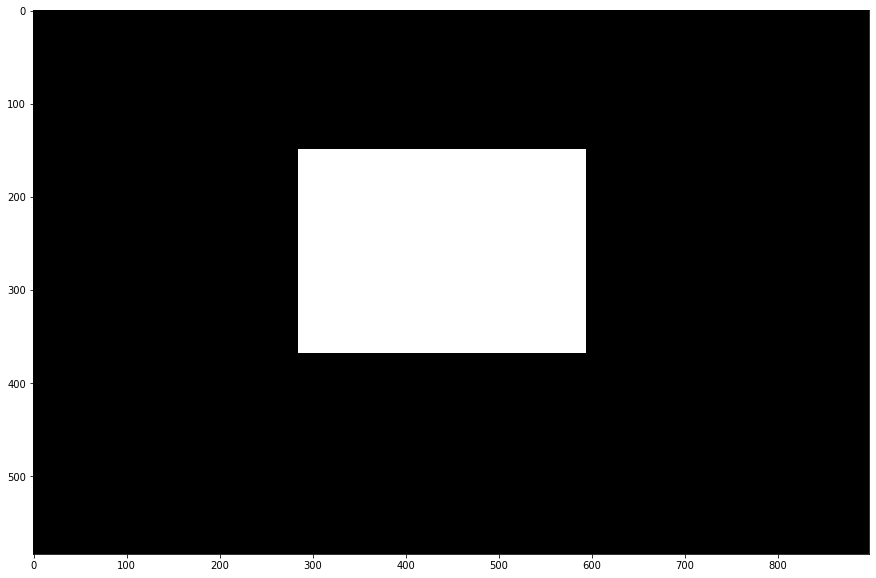

In [230]:
shp=cv2.imread('./images/shape4.png',0)

thr,mask=cv2.threshold(shp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow('',mask)

In [232]:
contours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [235]:
print(contours,'\n',_)

[array([[[285, 149]],

       [[285, 367]],

       [[593, 367]],

       [[593, 149]]], dtype=int32)] 
 [[[-1 -1 -1 -1]]]


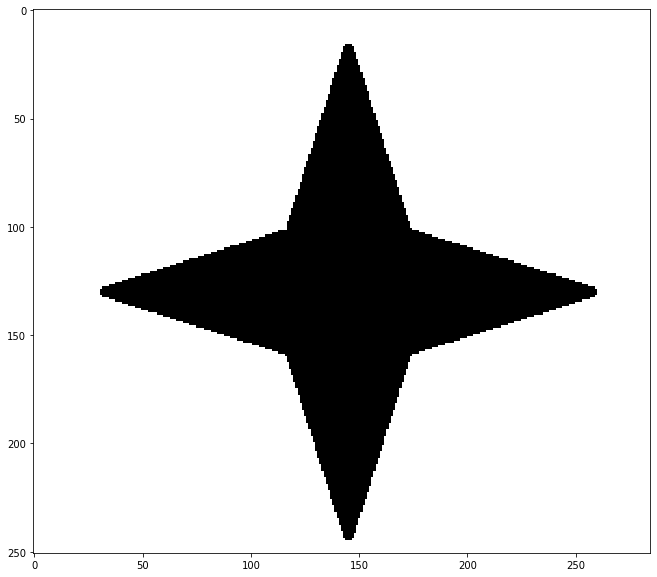

In [265]:
star=cv2.imread('star.png',0)
thr,mask=cv2.threshold(star,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask=255-mask
contours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

imshow('',star)

cont=cv2.drawContours(star,contours,-1,(255,0,0),10)

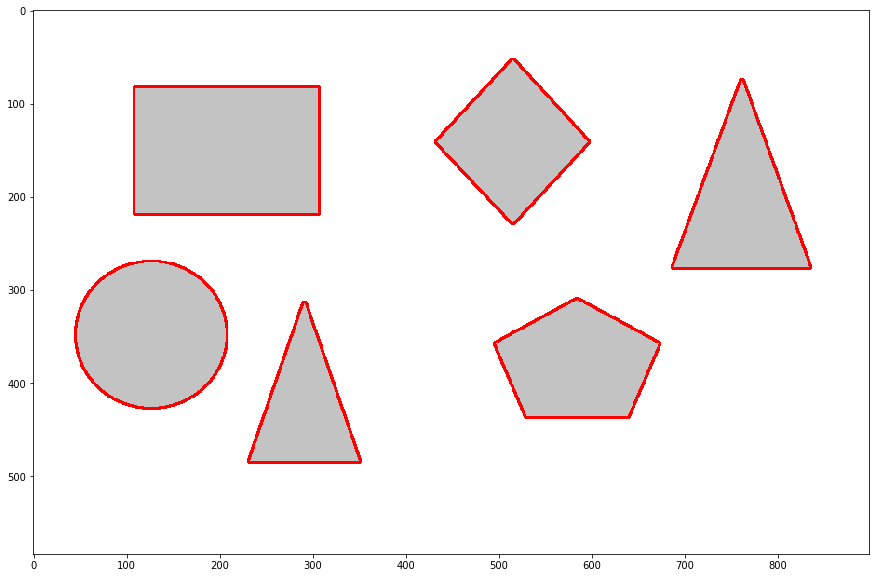

In [271]:
star=cv2.imread('./images/shape3.png')

gray=cv2.cvtColor(star,cv2.COLOR_BGR2GRAY)

thr,mask=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

mask=255-mask
contours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cont=cv2.drawContours(star,contours,-1,(0,0,255),2)

imshow('',cont)

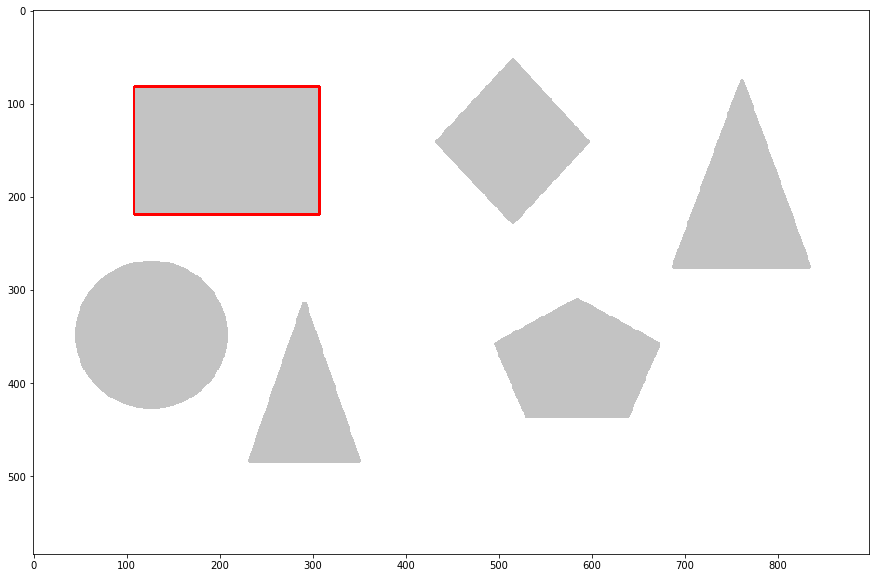

In [290]:
img=cv2.imread('./images/shape3.png')

gray=cv2.cvtColor(star,cv2.COLOR_BGR2GRAY)

cont=cv2.drawContours(star,[contours[3]],-1,(0,0,255),2)
imshow('',cont)
#for x in range(len(contours)):
 #   cont=cv2.drawContours(star,[contours[x]],-1,(0,0,255),2)
#    imshow('',cont)

shape=240 length=513.7056245803833 approx=3
-------------------- 


shape=300 length=515.9310202598572 approx=5
-------------------- 


shape=226 length=531.8721435070038 approx=8
-------------------- 


shape=4 length=672.0 approx=4
-------------------- 


shape=298 length=616.7178171873093 approx=3
-------------------- 


shape=56 length=493.0336227416992 approx=4
-------------------- 




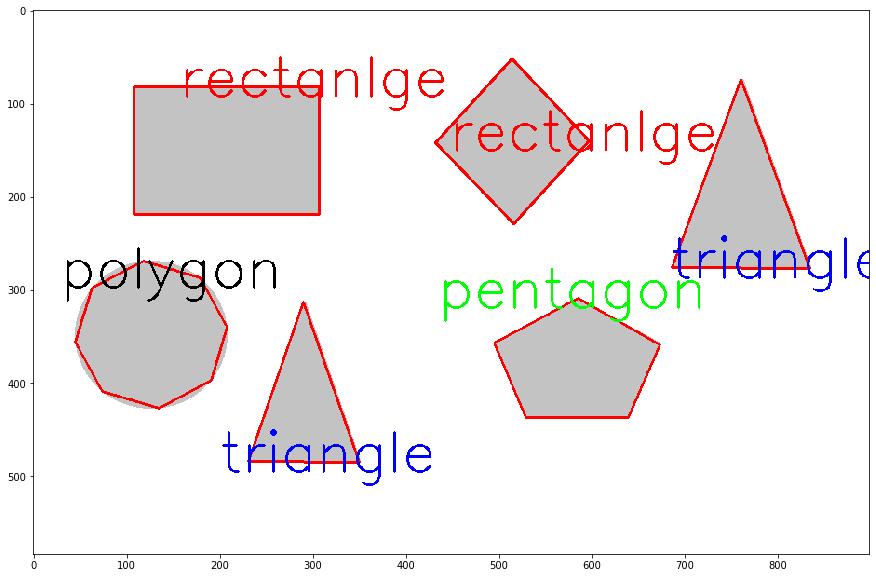

In [453]:
img=cv2.imread('./images/shape3.png')

po=['triangle','rectangle','pentagon','polygon']
for con in contours:
    
    peri=cv2.arcLength(con,True)
    approx=cv2.approxPolyDP(con,0.02*peri,True)
    
    
    
    print(f"shape={len(con)} length={peri} approx={len(approx)}")
    
    
    cv2.drawContours(img,[approx],-1,(0,0,255),2)
    print('-'*20,'\n'*2)
    for i in range(len(approx)):
        x=approx[i][0][0]
        y=approx[i][0][1]
        #cv2.circle(img,(x,y),4,(0,255,0),-1)
         
#cv2.putText(img,,(x-150,y+10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),2)
        
      
        
        
    if len(approx)==3:
        cv2.putText(img,'triangle',(x-150,y+10),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),2)
    elif len(approx)==4:
        cv2.putText(img,'rectanlge',(x-150,y+10),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),2)
    elif len(approx)==5:
        cv2.putText(img,'pentagon',(x-150,y+10),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)
    else:
        cv2.putText(img,'polygon',(x-150,y+10),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,0),2)    

  

    
    
imshow('',img)

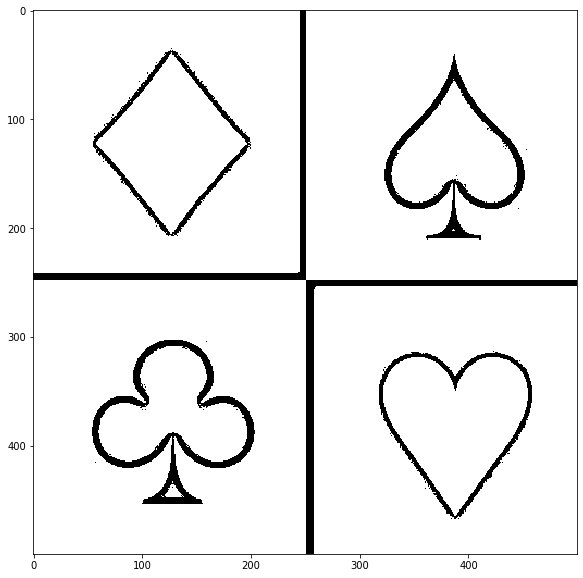

 shape=312 length=577.0264718532562 approx=16
 shape=301 length=754.8254615068436 approx=27
 shape=248 length=654.6833274364471 approx=20
 shape=321 length=564.4234412908554 approx=9


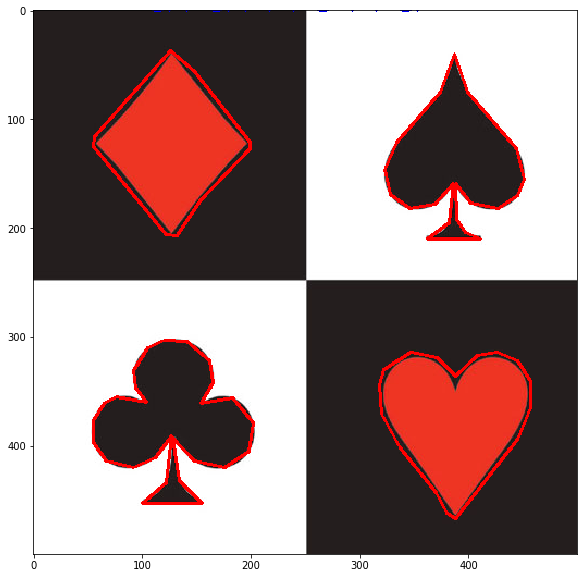

In [459]:
card=cv2.imread('card.jpg')
gray=cv2.cvtColor(card,cv2.COLOR_BGR2GRAY)
card_bin=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,19,6)
imshow('',card_bin)
card_bin2=255-card_bin

contours_c,_=cv2.findContours(card_bin2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for con in contours_c:
    
    peri=cv2.arcLength(con,True)
    approx=cv2.approxPolyDP(con,0.005*peri,True)
    
    if len(con)>=100:
        print(f" shape={len(con)} length={peri} approx={len(approx)}")
        cv2.drawContours(card,[approx],-1,(0,0,255),2)
    x=approx[0][0][0]
    y=approx[0][0][1]
if len(approx)<=9:
    cv2.putText(card,'diamond',(x-150,y),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),2)
elif len(approx)<16:
    cv2.putText(card,'heart',(x-150,y),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),2)
elif len(approx)<=20:
    cv2.putText(card,'spade',(x-150,y),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)
else:
    cv2.putText(card,'clover',(x-150,y),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,0),2)        
        

imshow('',card)

[[[542  96]]

 [[ 97 265]]

 [[454 932]]

 [[920 733]]]


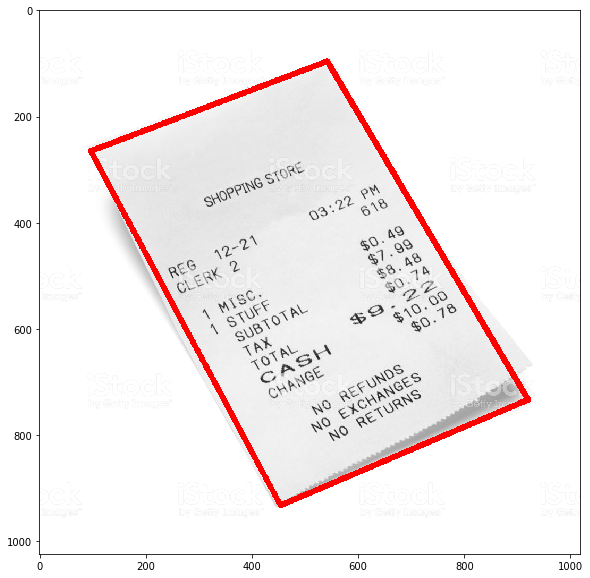

In [548]:
re=cv2.imread('receipt.jpg')
gr=cv2.cvtColor(re,cv2.COLOR_BGR2GRAY)
re_b=cv2.medianBlur(gr,31)
_,re_th=cv2.threshold(re_b,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
re_th=255-re_th
contours_r,_=cv2.findContours(re_th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for con in contours_r:
    
    peri=cv2.arcLength(con,True)
    approx=cv2.approxPolyDP(con,0.02*peri,True)
    print(approx)

cv2.drawContours(re,[approx],-1,(0,0,255),9)

imshow('',re)

iteration=0


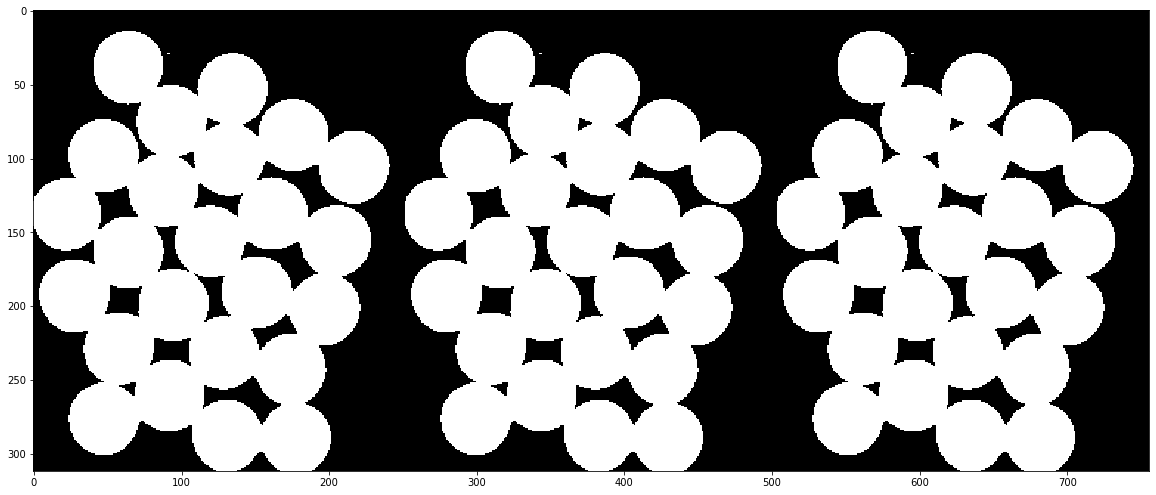

iteration=1


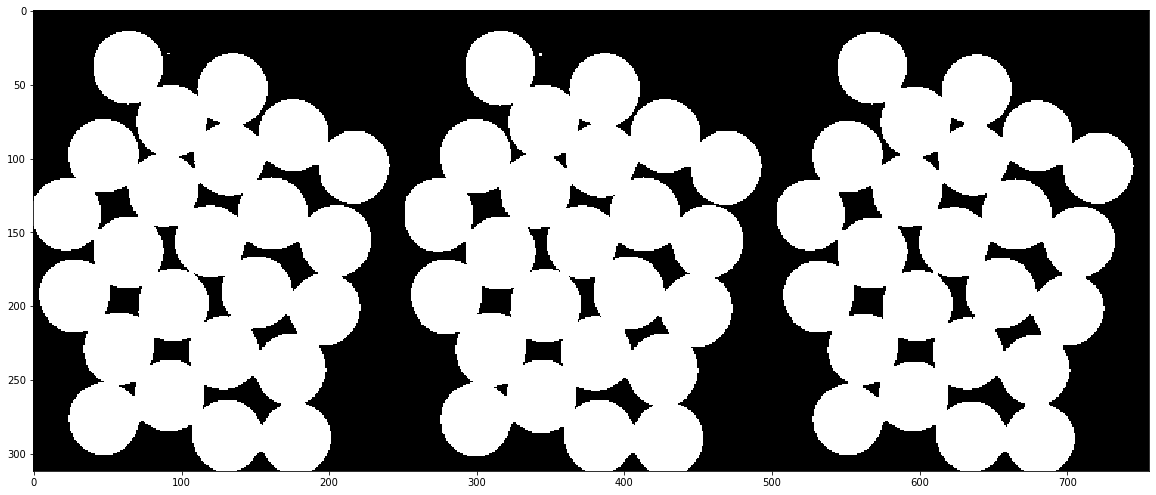

iteration=2


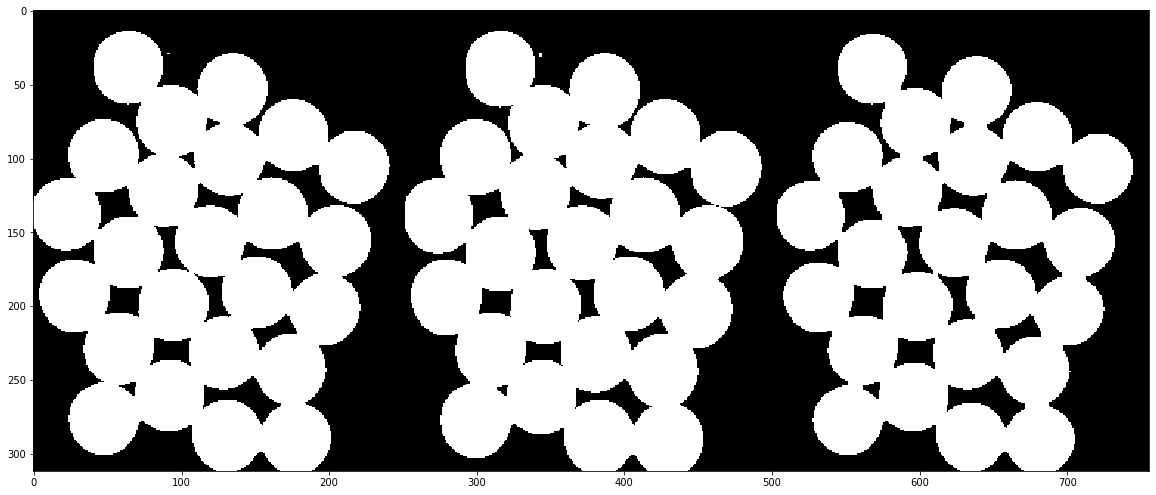

iteration=3


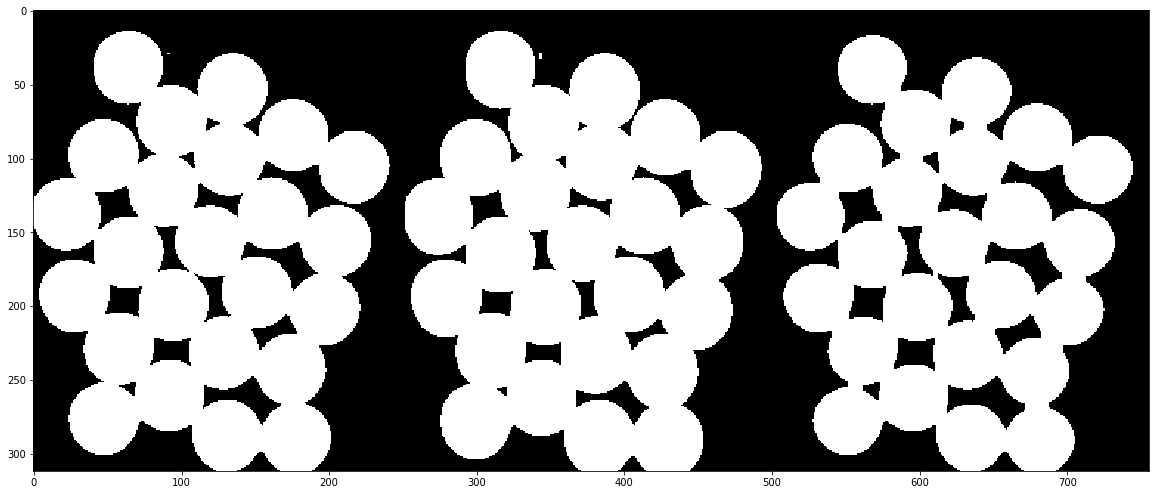

iteration=4


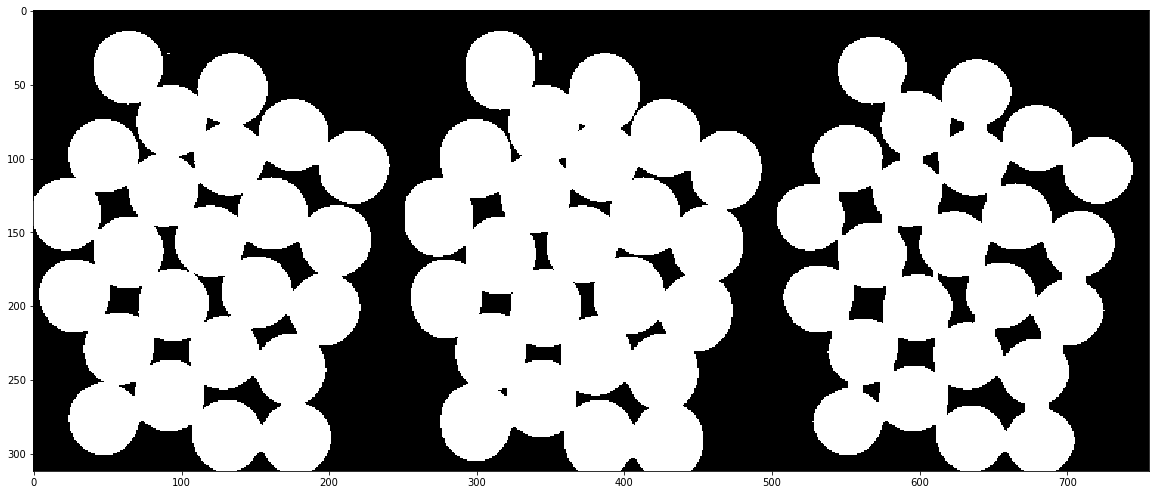

iteration=5


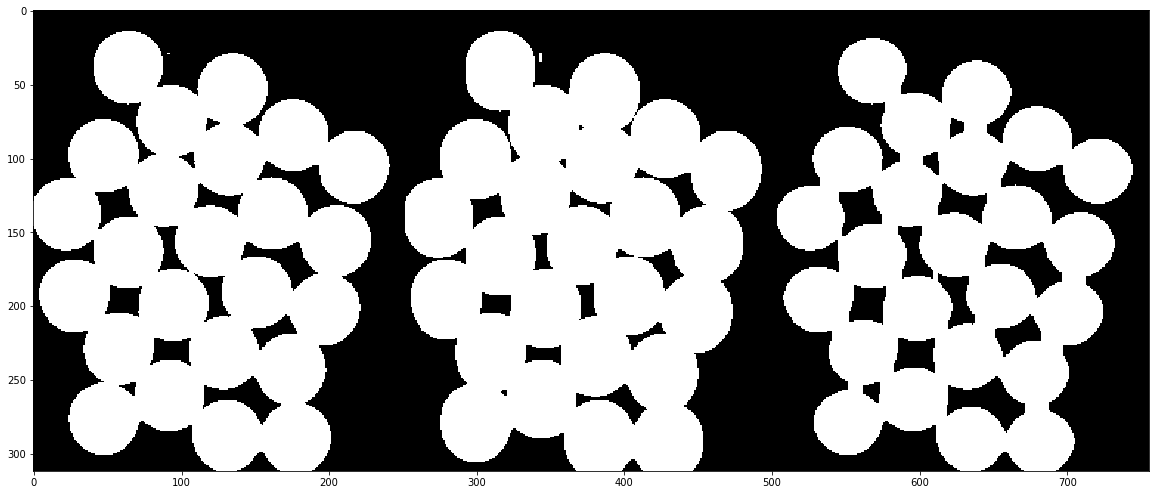

iteration=6


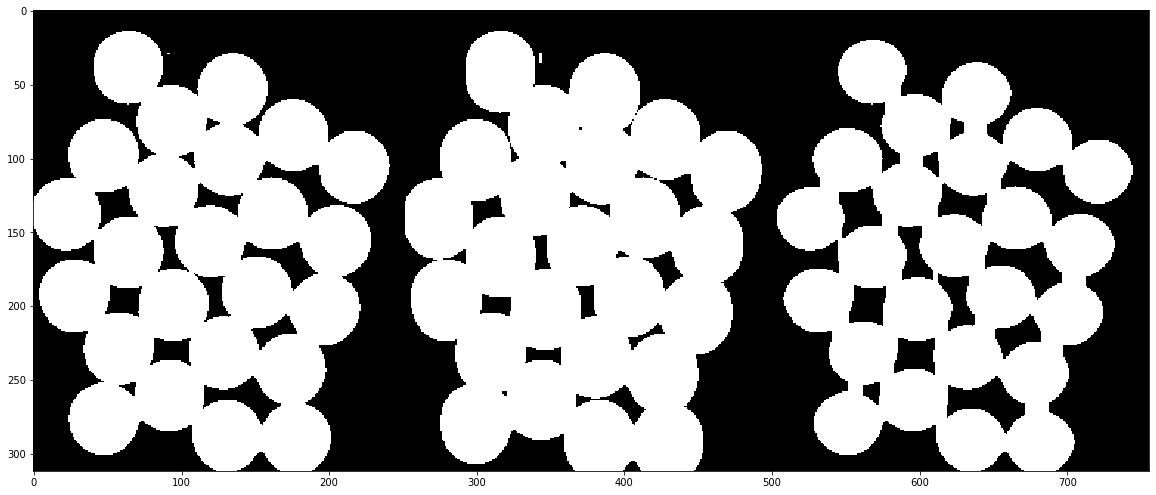

iteration=7


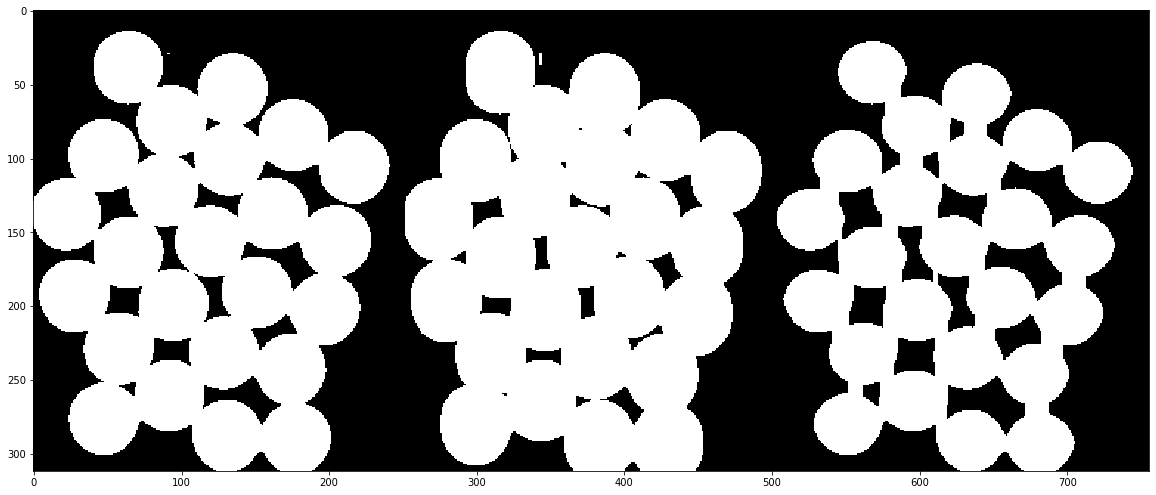

iteration=8


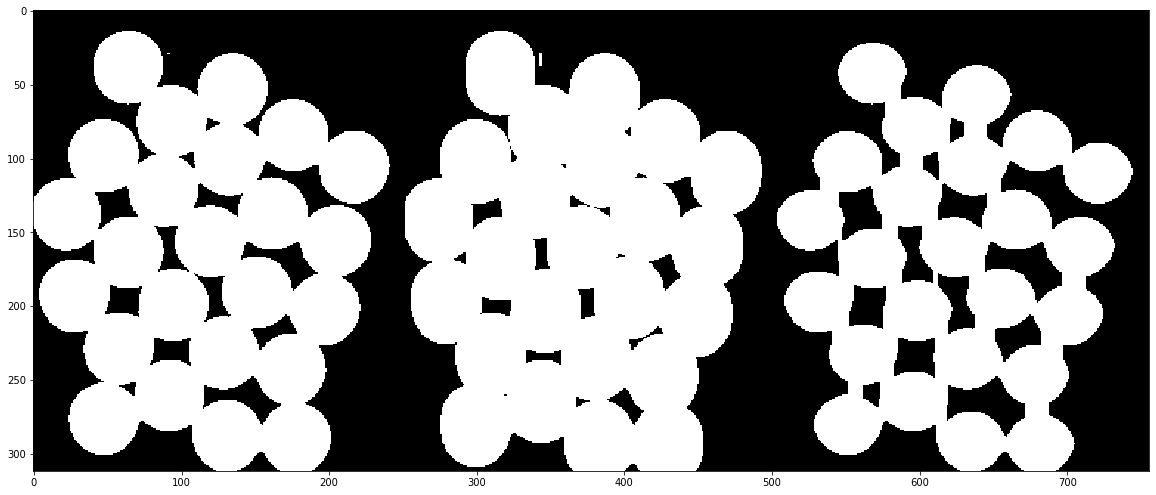

iteration=9


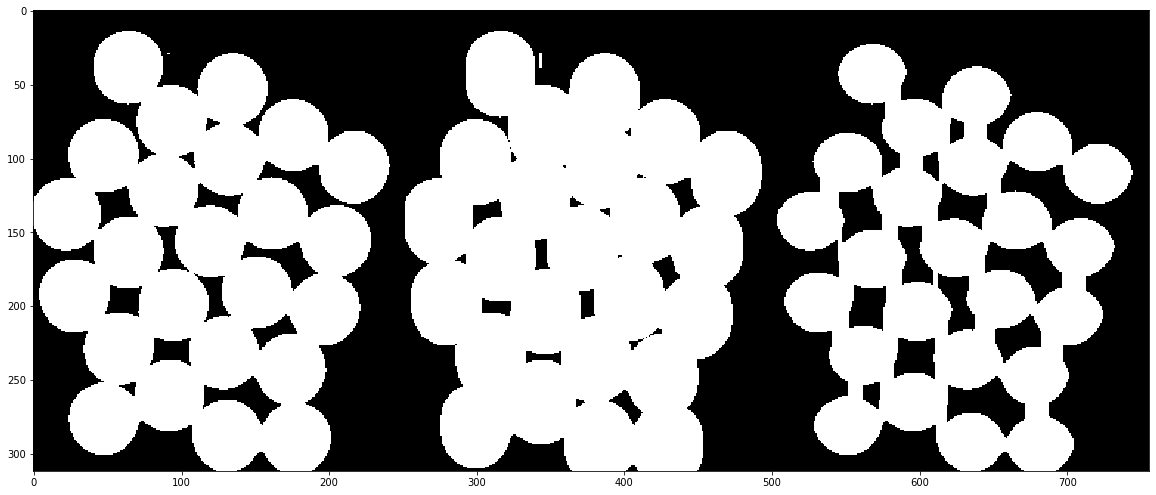

In [578]:
coin=cv2.imread('./images/water_coins.jpg')
grayc=cv2.cvtColor(coin,cv2.COLOR_BGR2GRAY)
_,co_bi=cv2.threshold(grayc,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
co_bi=255-co_bi
for x in range(10):
    print('iteration=%.f'%(x))
    dilated=cv2.morphologyEx(co_bi,cv2.MORPH_DILATE,(3,3),iterations=x)
    eroded=cv2.morphologyEx(co_bi,cv2.MORPH_ERODE,(3,3),iterations=x)
    imshow('',np.hstack([co_bi,dilated,eroded]))



iteration=1


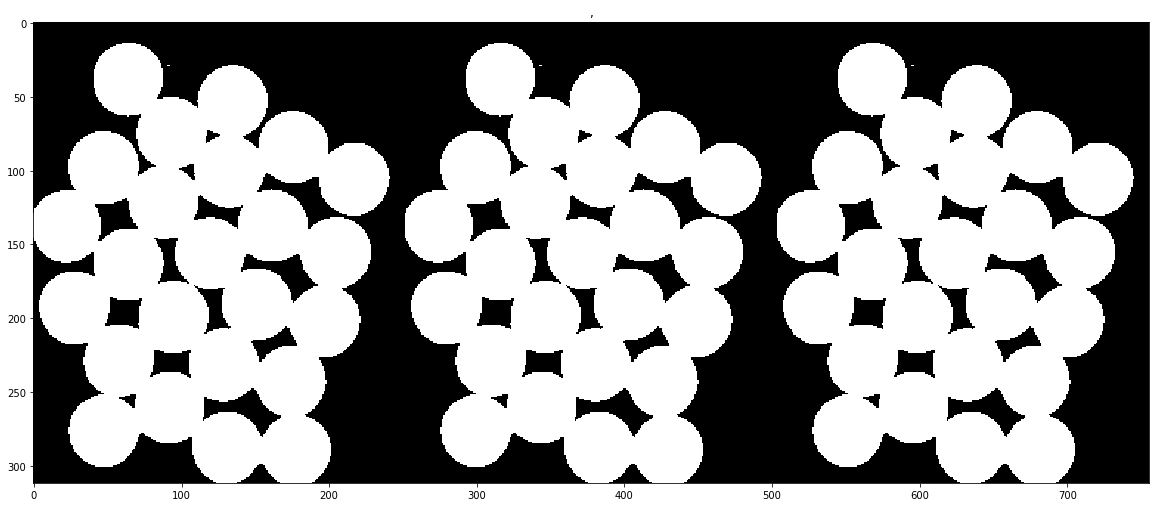

iteration=2


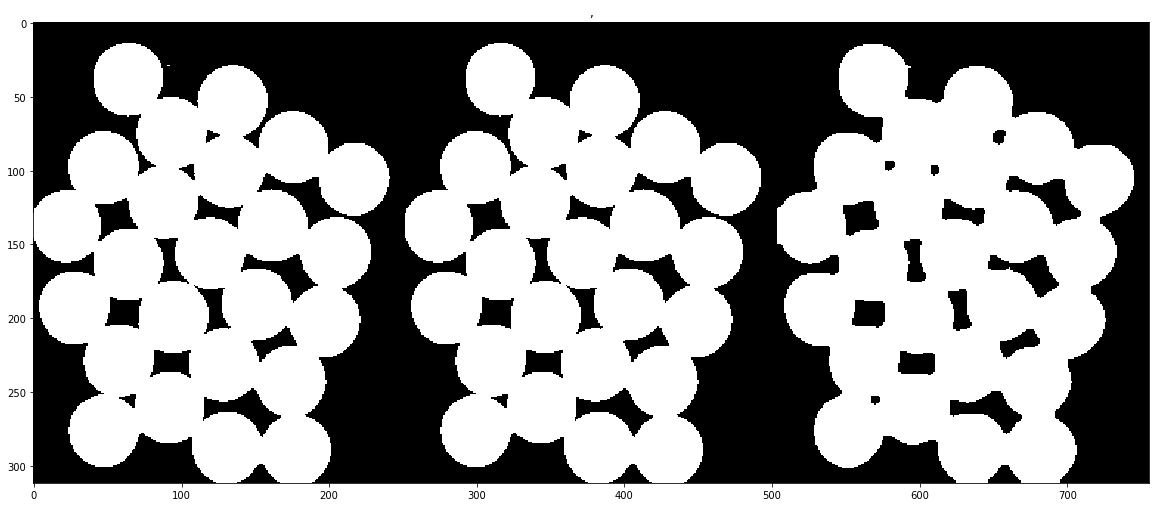

iteration=3


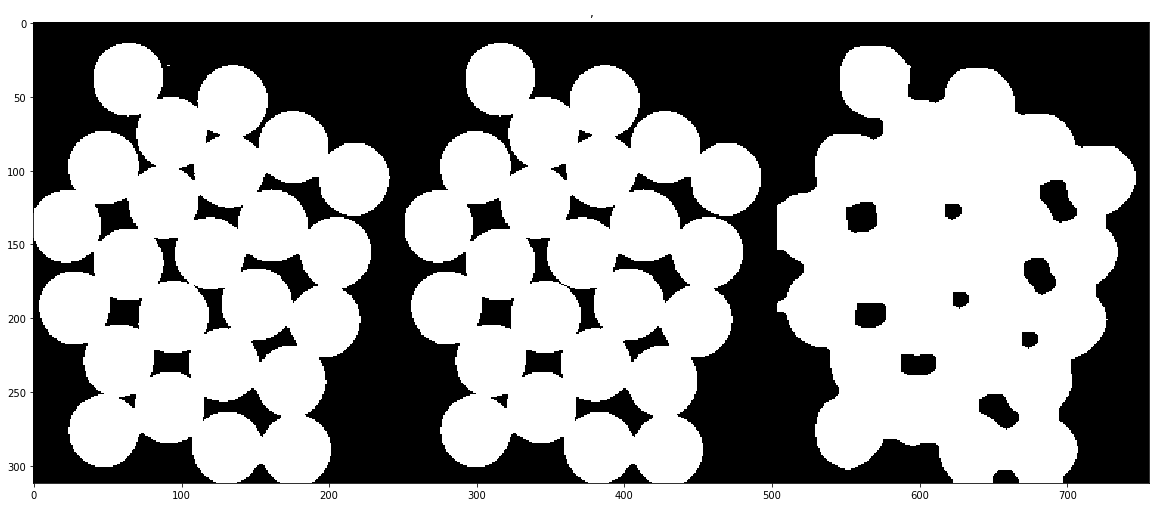

iteration=4


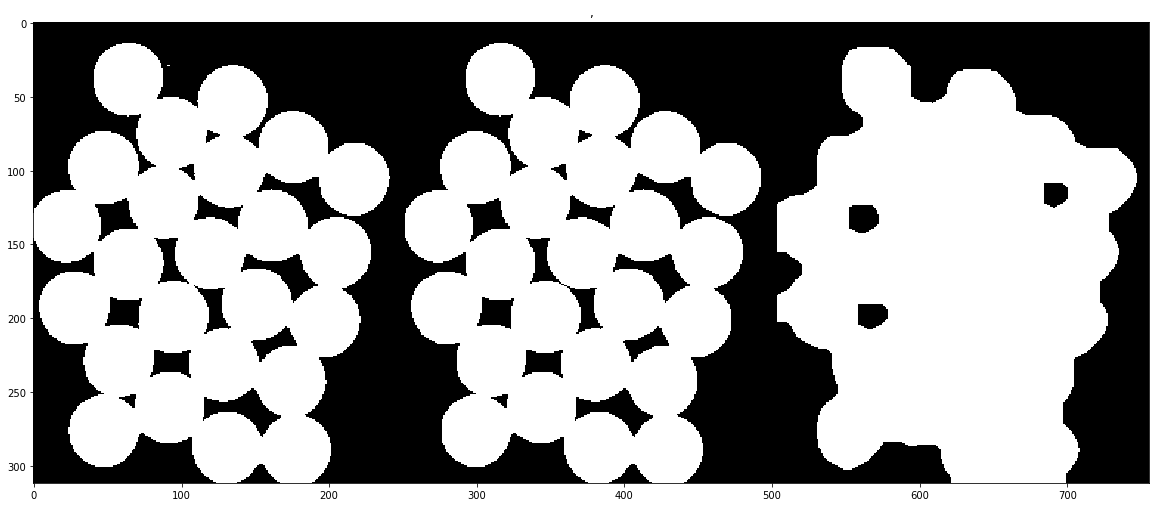

iteration=5


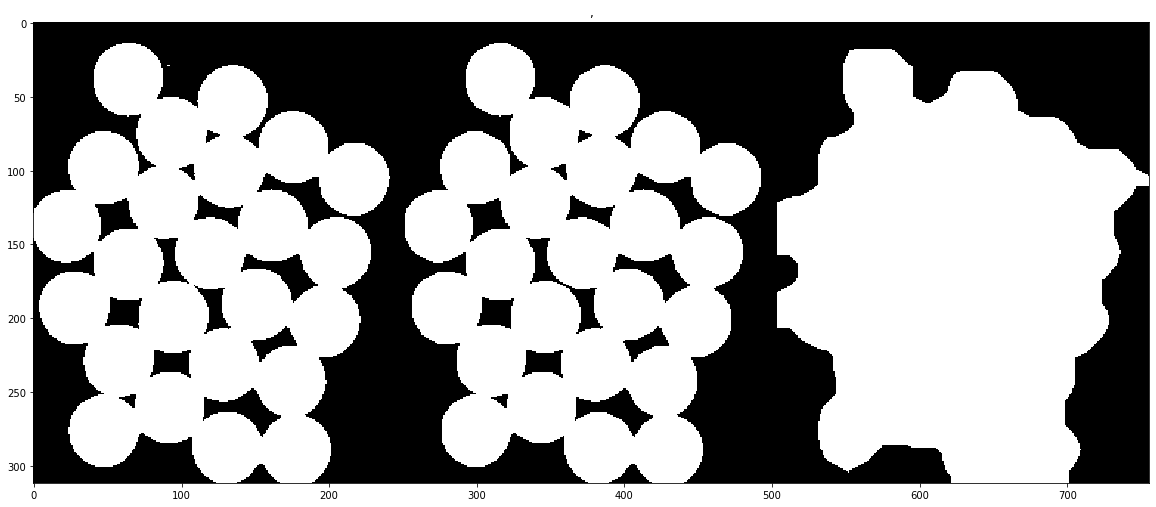

iteration=6


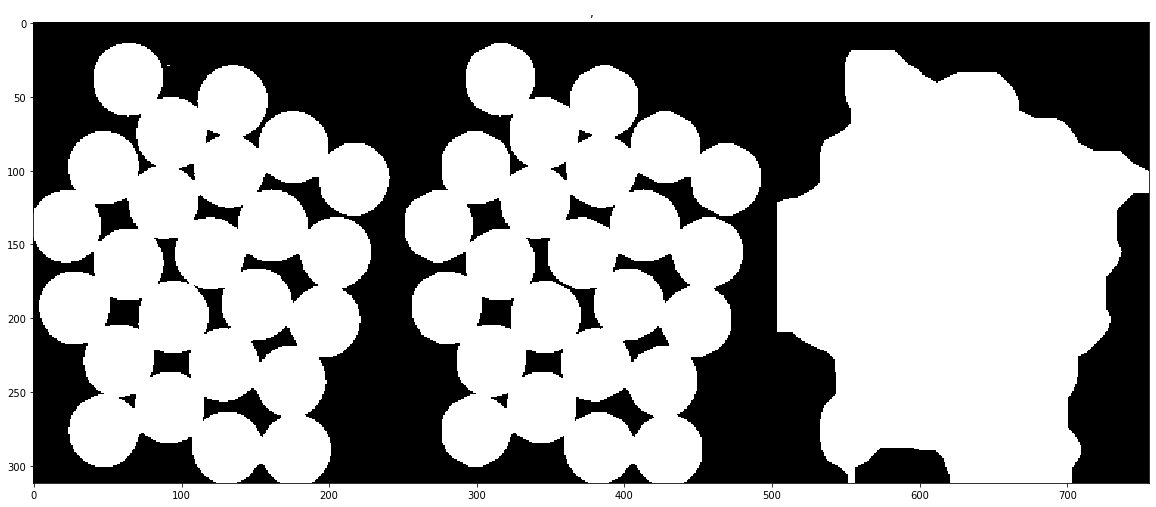

iteration=7


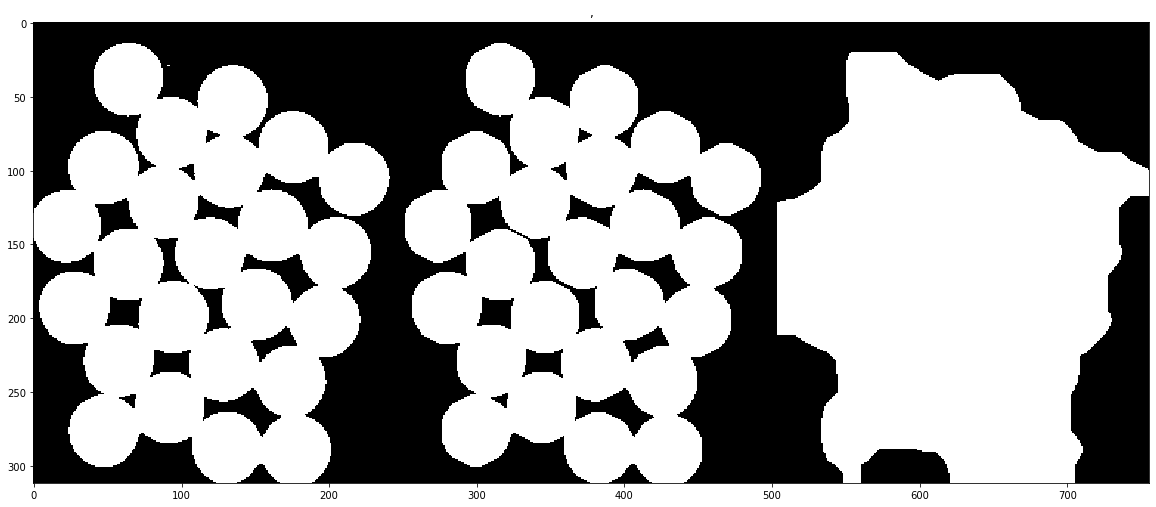

iteration=8


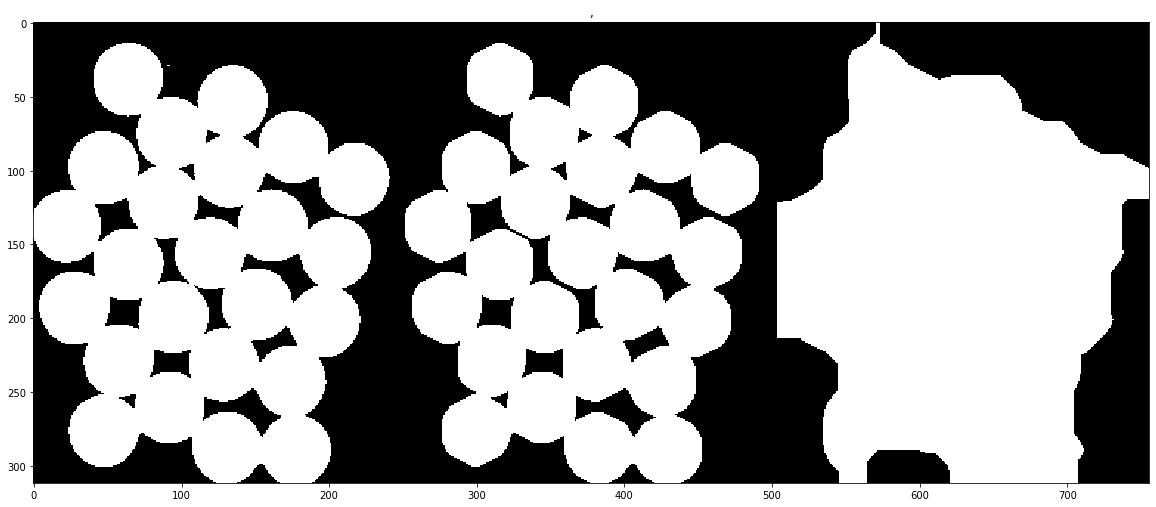

iteration=9


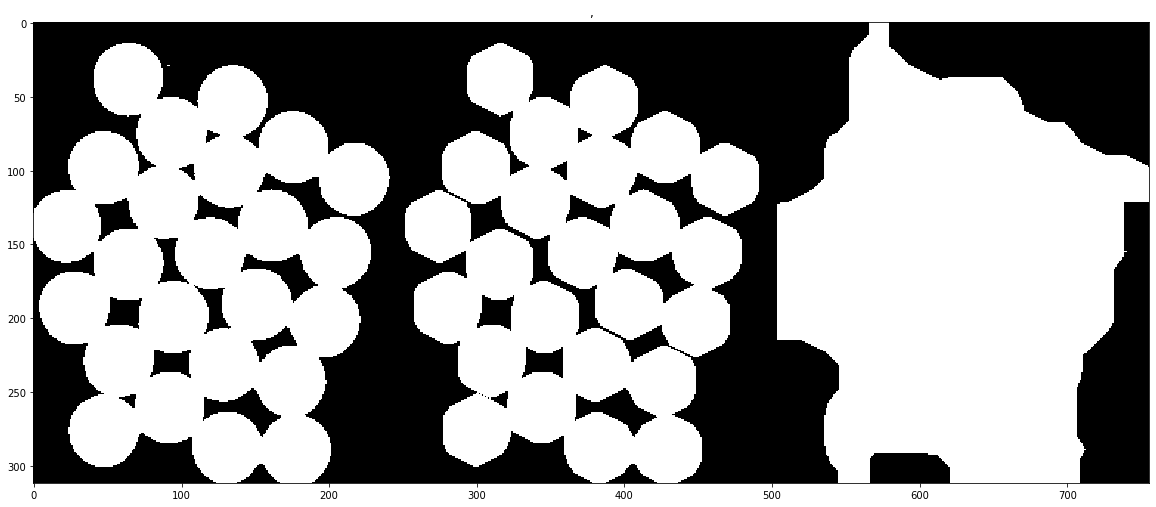

iteration=10


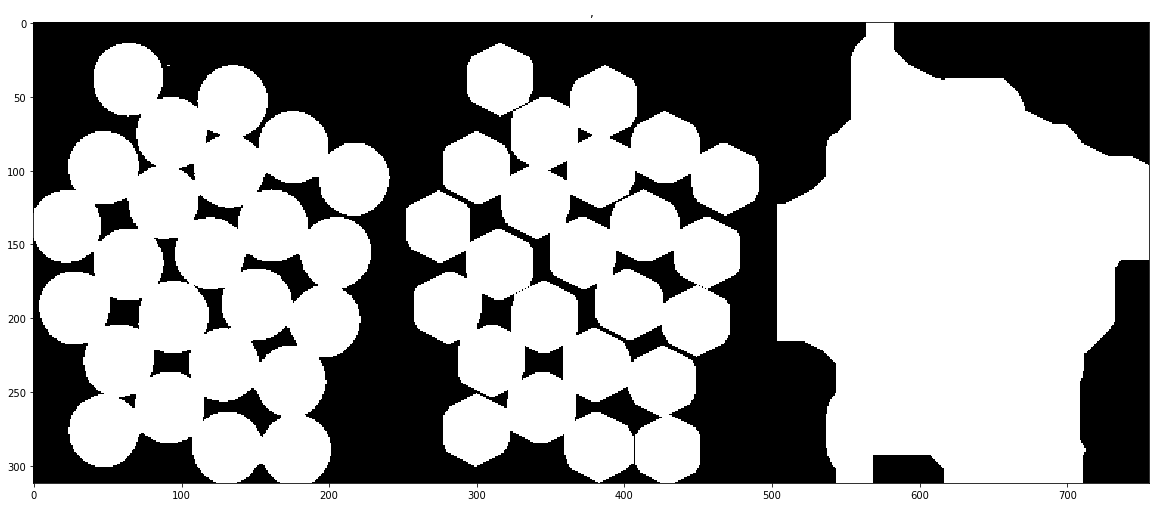

In [579]:
for x in range(10):
    print('iteration=%.f'%(x+1))
    opened=cv2.morphologyEx(co_bi,cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),iterations=x) #침식 후 팽창
    closed=cv2.morphologyEx(co_bi,cv2.MORPH_CLOSE,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6)),iterations=x) # 팽창 후 침식

    imshow(',',np.hstack([co_bi,opened,closed]))

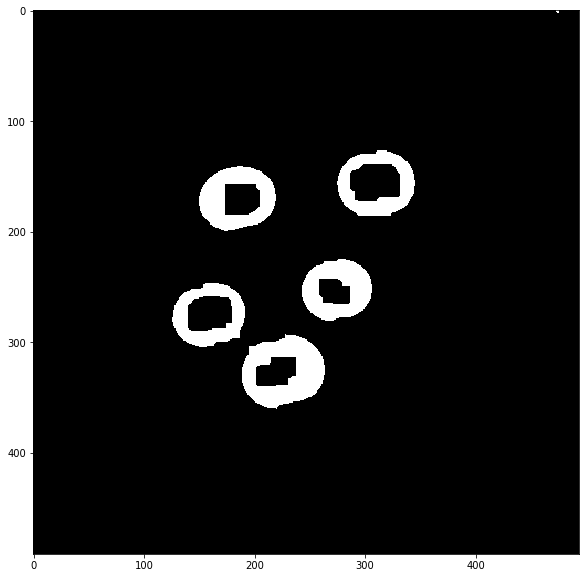

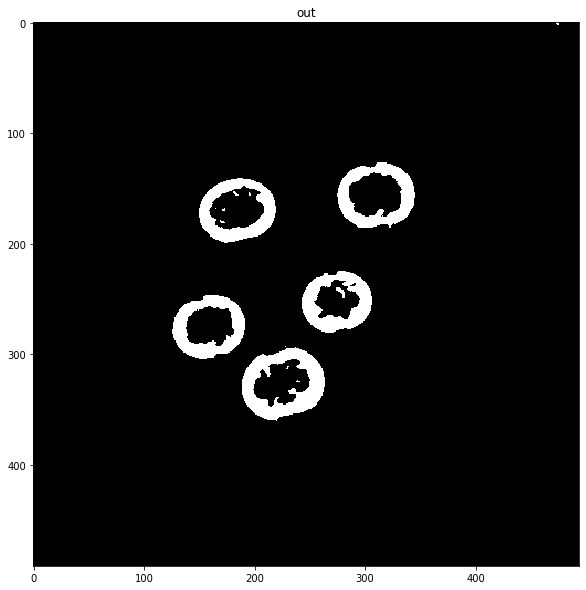

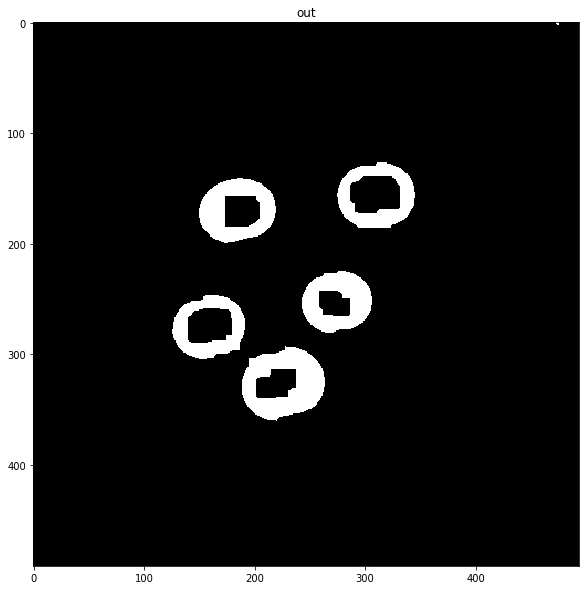

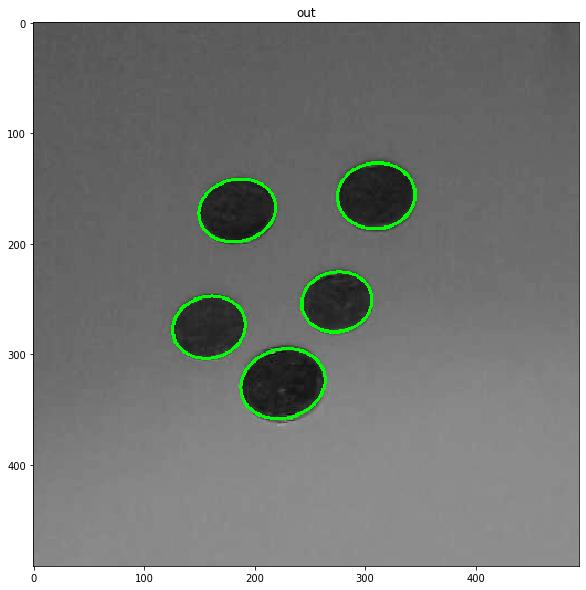

In [787]:
frame=cv2.imread('./images/coin.png')
roi=frame.copy()
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
gray_blur=cv2.GaussianBlur(gray,(7,7),0)
thr=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,45,6)

kernel=np.ones((3,3),np.uint8)
closing=cv2.morphologyEx(thr,cv2.MORPH_CLOSE,kernel,iterations=7)
imshow('',closing)

cont_img=closing.copy()
contours,_=cv2.findContours(cont_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area=cv2.contourArea(cnt)
    if area<2000 or area>4000:
        continue
    if len(cnt)<5:
        continue
    
    ellipse=cv2.fitEllipse(cnt)
    cv2.ellipse(roi,ellipse,(0,255,0),2)

    
imshow('out',thr)

imshow('out',cont_img)

imshow('out',roi)

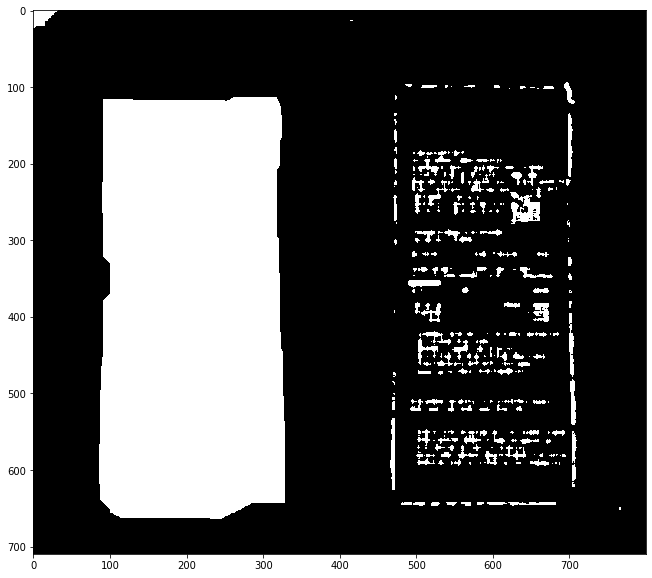

 shape=139 length=93.11269855499268 approx=4 area=404.0
 shape=11 length=1563.4213545322418 approx=4 area=125518.0


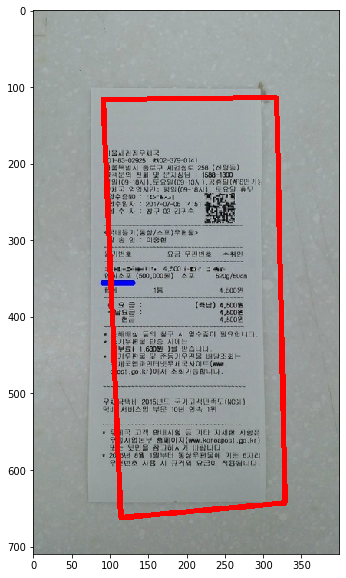

In [898]:
img=cv2.imread('receipt2.jpg')
cop=img.copy()

cop_g=cv2.cvtColor(cop,cv2.COLOR_BGR2GRAY)

cop_g=cv2.medianBlur(cop_g,7)


#,cop_b=cv2.threshold(cop_g,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

cop_b=cv2.adaptiveThreshold(cop_g,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY_INV,57,6)

cop_cl=cv2.morphologyEx(cop_b,cv2.MORPH_CLOSE,
                        cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6)),
                        iterations=20)

cont_c,_=cv2.findContours(cop_cl,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


imshow('',np.hstack([cop_cl,cop_b]))

for con in cont_c:
    print(f" shape={len(con)} length={peri} approx={len(approx)} area={area}")
    area=cv2.contourArea(con)
    peri=cv2.arcLength(con,True)
    approx_r=cv2.approxPolyDP(con,0.02*peri,True)
    
    if area>=10000:
        

        cop_c=cv2.drawContours(cop,[approx_r],-1,(0,0,255),5)
        
        
imshow('',cop_c)


In [783]:




b,g,r=cv2.split(img)

for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        if 
        

SyntaxError: invalid syntax (<ipython-input-783-5d489e46cbb3>, line 9)

array([[[17,  0]],

       [[15, 31]],

       [[ 0, 34]],

       [[15, 33]]], dtype=int32)